Notebook tutorial about nimfa
https://github.com/mims-harvard/nimfa-ipynb/blob/master/ICGC%20and%20Nimfa.ipynb  
Nimfa documentation
http://ai.stanford.edu/~marinka/nimfa/nimfa.methods.factorization.nsnmf.html

In [83]:
import nimfa 
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.colors import ListedColormap
from collections import Counter
import dill
import plotly
import plotly.express as px
from matplotlib.lines import Line2D
from datetime import date
from datetime import datetime
import os

In [20]:
# dill.load_session('Protein_165_Clustering_py_final_env.db')

#dill.load_session('Results_EMIF_proteins_01-06-2022/1_Protein_165_Clustering_py_final_env_01-06-2022(0).db')

In [21]:
# files_dirs = os.listdir('Results_clustering')
# print(files_dirs)

In [84]:
day = date.today().strftime("%d-%m-%Y")

results_dir = 'Results_proteins_' + str(day)


files_dirs = os.listdir()

flag = False
for file in files_dirs:
    if results_dir in file:
        file_name = file.split('(')
        flag = True
        if len(file_name) != 1:
            number = file_name[1][:-1]
            new_number = str(int(number) + 1)
        else:
            new_number = '1'

if flag == True:
    results_dir = results_dir + '(' + str(new_number) + ')'
    new_run = '(' + str(new_number) + ')'
if flag != True:
    new_run = '(0)'

# results_dir = 'Results_clustering/' + 'Results_165_proteins_' + str(day) 

os.mkdir(results_dir)

In [85]:
results_dir = results_dir

print(results_dir)

Results_proteins_09-07-2024


## **Importing the dataset**

In [90]:
# Importing A-beta positive Dataset
ab_pos_df = pd.read_excel('../data/165_proteins_all.xlsx')
#ab_pos_df = pd.read_excel('EMIF-AD_preprocessed_165proteins_MCI-SCI.xlsx', sheet_name='Amyloid_positives', index_col=[0])
#ab_pos_df = pd.read_excel('EMIF-AD_preprocessed_PLSDA_MCI.xlsx', sheet_name='Amyloid_positives', index_col=[0])

# Storing the Uniprot code and dropping the row
#uniprot_code = list(ab_pos_df.columns)
#ab_pos_df = ab_pos_df.drop(['Uniprot'])
protein_name = ab_pos_df['Short name']
ab_pos_df.drop(columns=['#', 'Protein','Short name', 'Accession Number', 'Protein Name', 'Number peptides'], inplace =True)
# Transposing the matrix
#ab_pos_df = ab_pos_df.T
# Storing the Patient code (columns index) and Protein-Entry code (rows index)
patient_code = list(ab_pos_df.columns)
print(patient_code)
#protein_code = list(ab_pos_df.index)
protein_code = list(protein_name)
print(protein_code)
# Generating the V numpy matrix
V = np.array(ab_pos_df.values)

print(V.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/165_proteins_all.xlsx'

In [54]:
print(f'The A-beta positive dataframe has dimension: \n {V.shape[0]} rows (proteins) x {V.shape[1]} columns (patients)')

ab_pos_df

The A-beta positive dataframe has dimension: 
 165 rows (proteins) x 128 columns (patients)


,L07,L09,L10,L11,L12,L13,L14,L15,L16,L17,...,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60
0,0.000329,0.000264,0.000197,0.000267,0.000200,0.000304,0.000254,0.000291,0.000423,0.000348,...,0.000108,0.000144,0.000142,0.000116,0.000096,0.000082,0.000107,0.000103,0.000119,0.000401
1,0.000852,0.000662,0.001744,0.001038,0.001076,0.001366,0.001770,0.001675,0.001130,0.001280,...,0.000847,0.001001,0.000742,0.000768,0.001335,0.000893,0.000597,0.000620,0.000317,0.000957
2,0.020147,0.015572,0.011901,0.019694,0.013097,0.018108,0.019711,0.018951,0.022560,0.012957,...,0.007869,0.011235,0.010793,0.010275,0.009932,0.009165,0.006709,0.008458,0.013165,0.013442
3,0.000549,0.000277,0.000438,0.000666,0.000693,0.000388,0.000505,0.000882,0.000657,0.000646,...,0.000487,0.000514,0.000350,0.000452,0.000452,0.000406,0.000370,0.000393,0.000387,0.000284
4,0.000497,0.000500,0.000234,0.000438,0.000075,0.000302,0.000204,0.000235,0.000675,0.000422,...,0.000434,0.000642,0.000536,0.000410,0.000469,0.000499,0.000324,0.000318,0.000056,0.000637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.000173,0.000138,0.000249,0.000109,0.000171,0.000195,0.000273,0.000266,0.000176,0.000206,...,0.000229,0.000251,0.000305,0.000233,0.000112,0.000171,0.000092,0.000097,0.000100,0.000155
161,0.000326,0.000222,0.000133,0.000121,0.000403,0.000254,0.000526,0.000379,0.000146,0.000297,...,0.000242,0.000109,0.000139,0.000179,0.000130,0.000190,0.000063,0.000338,0.000294,0.000078
162,0.000433,0.000595,0.000660,0.000449,0.000817,0.000251,0.000677,0.000660,0.000590,0.000493,...,0.000656,0.000313,0.000504,0.000309,0.000668,0.000388,0.000392,0.000370,0.000433,0.000428
163,0.000183,0.000598,0.000238,0.000684,0.000184,0.000176,0.000205,0.001104,0.000284,0.000329,...,0.000218,0.000092,0.000276,0.000212,0.000598,0.000331,0.000289,0.000267,0.000302,0.000305


In [55]:
# fig, ax = plt.subplots(figsize=(8, 18))

# # Plotting the heatmap of the W matrix
# sns.heatmap(np.array(V)[: , : ], cmap='hot', vmax=0.02) #Try without setting vmax

# Saving the plot
# plt.savefig(results_dir + '/Rank_2_W_matrix' + new_run +
# import


V = np.array(V)
print(V)
print(type(V))

v_list = []

for l in V:
    new_l = []
    for el in l:
        new_l.append(el)
    v_list.append(new_l)

[[0.00032928 0.00026358 0.00019748 ... 0.00010279 0.00011882 0.00040059]
 [0.00085185 0.00066247 0.001744   ... 0.00062011 0.00031661 0.00095702]
 [0.02014715 0.01557179 0.01190094 ... 0.00845791 0.01316509 0.01344196]
 ...
 [0.00043313 0.00059517 0.00065975 ... 0.0003705  0.000433   0.00042804]
 [0.00018308 0.00059762 0.00023791 ... 0.00026674 0.00030214 0.0003048 ]
 [0.00035926 0.00036037 0.00026881 ... 0.0005075  0.00048672 0.00026912]]
<class 'numpy.ndarray'>


<AxesSubplot: >

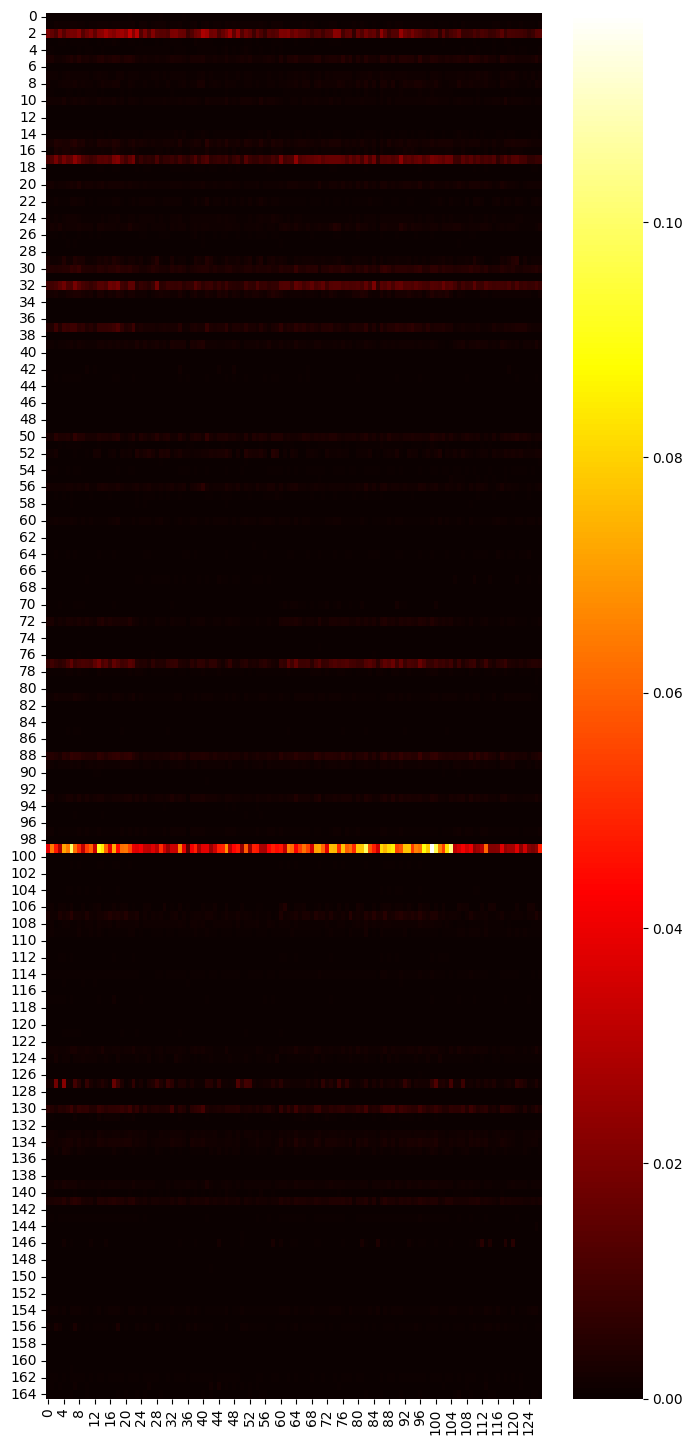

In [39]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(v_list, cmap='hot') #Try without setting vmax

### **Defining the number of runs and iterations**

In [40]:
n_run = 50
max_iter = 1000 
min_residuals = 0.001

### **Defining results storing variables**

In [41]:
cophonetic_results = {}
silhouette_results = {}

## **Rank = 2**

In [42]:
# Building the model with rank = 2
nsnmf_2 = nimfa.Nsnmf(V, rank=2, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                      track_factor=True, track_error=True, update='divergence', objective='div')
nsnmf_2_fit = nsnmf_2()

In [43]:
# number of iterations
len(nsnmf_2_fit.fit.tracker.get_error())

112

In [44]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_2 = nsnmf_2_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_2)

cophonetic_results['Rank_2'] = cophonetic_cor_coef_2

Cophenetic correlation coefficient: 0.9656474147264914


### **Consensus matrix**

C:\Users\danis\AppData\Local\Temp\ipykernel_15364\2150851459.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(C_2, method='average')


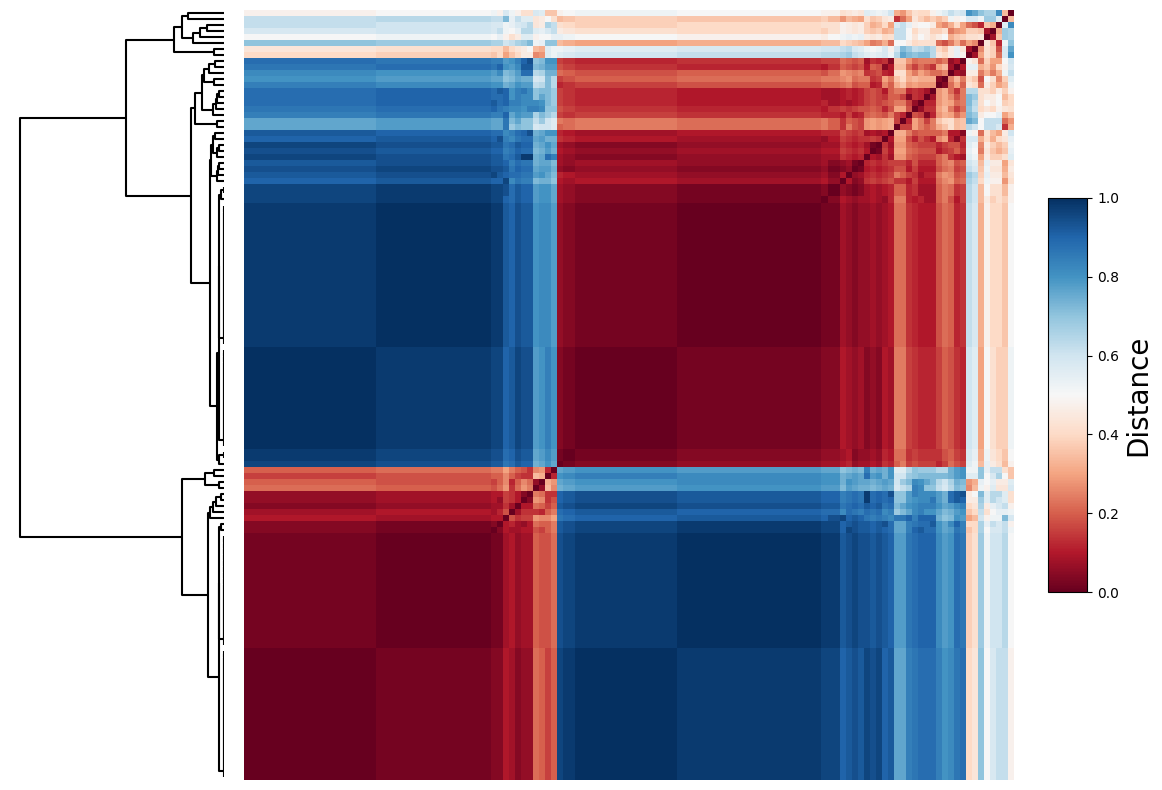

In [45]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_2 = 1 - nsnmf_2_fit.fit.consensus()
Y = sch.linkage(C_2, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_2[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu',)
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_2_Consensus_matrix' + new_run +'.png')

### **W matrix**

In [56]:
# Computing the W basis matrix
W_2 = np.array(nsnmf_2_fit.fit.basis())

print(f'The shape of the W matrix is: {W_2.shape[0]} rows (proteins) x {W_2.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 165 rows (proteins) x 2 columns (metaproteins)


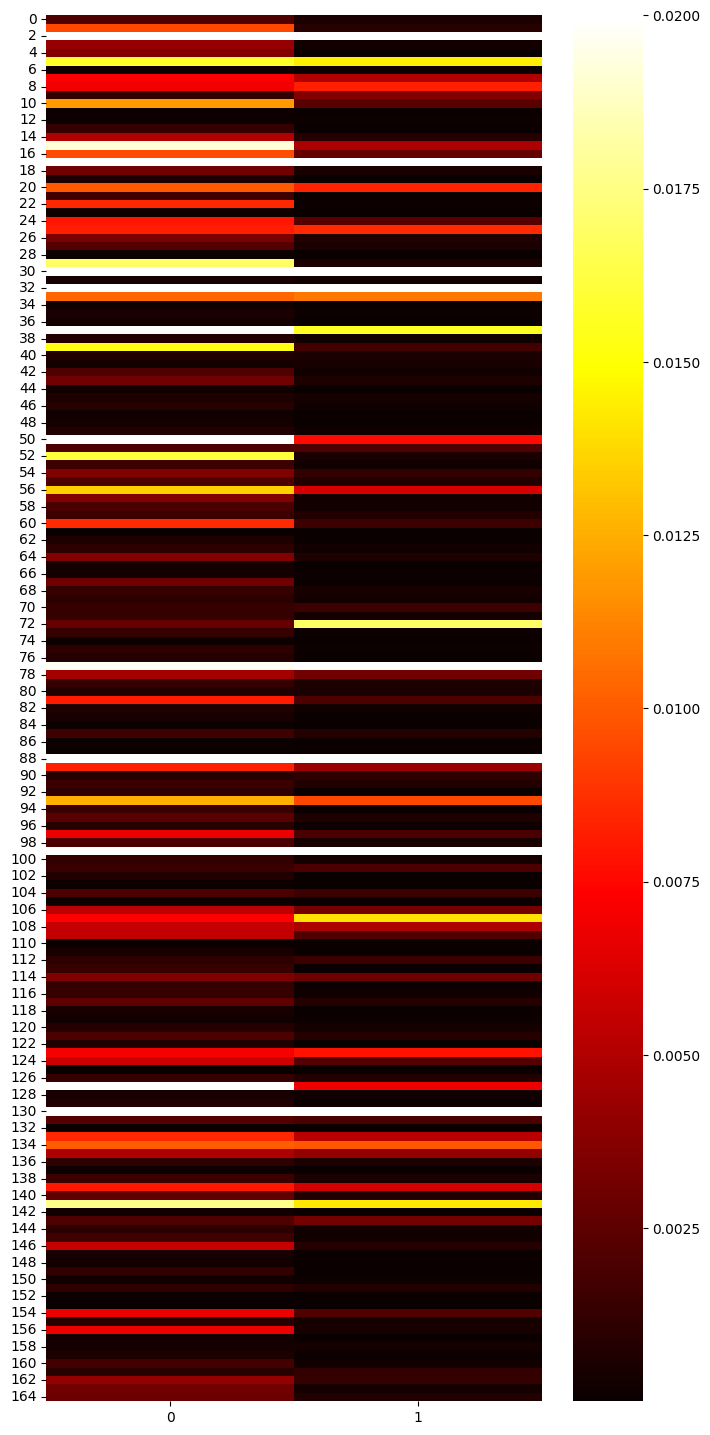

In [57]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_2[: , : ], cmap='hot', vmax=0.02) #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_2_W_matrix' + new_run +'.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [58]:
def k_proteins_of_metaprotein(W, cluster, k_protein=10, protein_code=protein_code):
    
    # converting in np.array
    W = np.array(W)
    # Dict with results
    protein_dict = {}

    for mtp in range(cluster):
        # sorting the proteins for their coefficient in the metaprotein
        topk = np.argsort(np.array(W[:, mtp]).flatten())[-k_protein:] #[::-1]
        # extracting the values corresponding to the topk sorted features
        val = W[topk, mtp]

        # retrieving the protein code for the topk proteins
        topk_labels = [protein_code[idx] for idx in topk]

        # storing the protien code and its coefficient in a dictionary
        protein_dict[mtp] = (val, topk_labels)

    return protein_dict

In [59]:
def plotting_metaproteins(protein_dict, k_protein=10):
    fig, ax = plt.subplots(len(protein_dict), 1, figsize=(7, 12))
    for clt, v in protein_dict.items():
        weight = v[0]
        labels = v[1]
        ax[clt].barh(np.arange(k_protein) + .5, weight, align='center')
        ax[clt].set_yticks(np.arange(k_protein) + .5)
        ax[clt].set_yticklabels(labels)
        ax[clt].set_xlabel('Weight')
        ax[clt].set_ylabel('Proteins')
        ax[clt].set_title("Cluster (Metaprotein): "+ str(clt), fontsize=15)

    fig.tight_layout()
    plt.show()

In [60]:
# extracting the topk proteins from each cluster (metaprotein)
prot_clusters_dict_2 = k_proteins_of_metaprotein(W_2, 2)

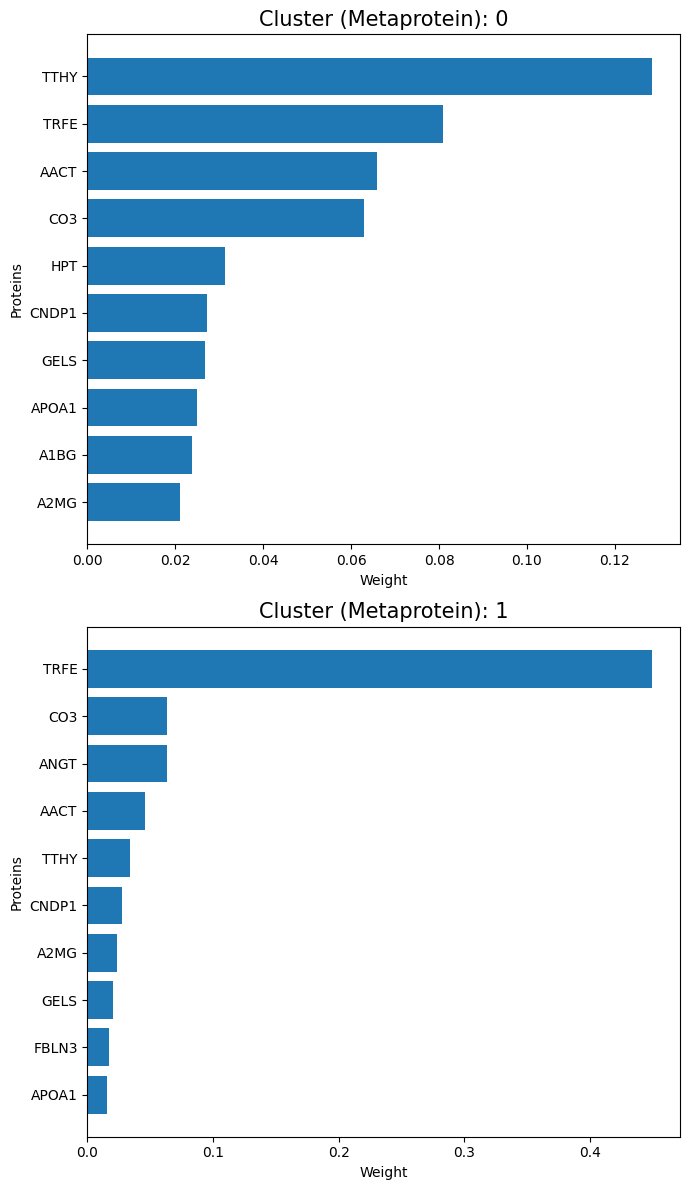

In [61]:
# plotting the topk proteins from each cluster
plotting_metaproteins(prot_clusters_dict_2)

In [62]:
# # print(prot_clusters_dict_2.values())
# for key in prot_clusters_dict_2.keys():
#     print('Cluster', key)
#     for prot in prot_clusters_dict_2[key][1]:
#         print(prot, end = ', ')
#     print()

### **H matrix**

In [63]:
# Computing the H coef matrix
H_2 = np.array(nsnmf_2_fit.fit.coef())

print(f'The shape of the H matrix is: {H_2.shape[0]} rows (metaprotein) x {H_2.shape[1]} columns (patients)')

The shape of the H matrix is: 2 rows (metaprotein) x 128 columns (patients)


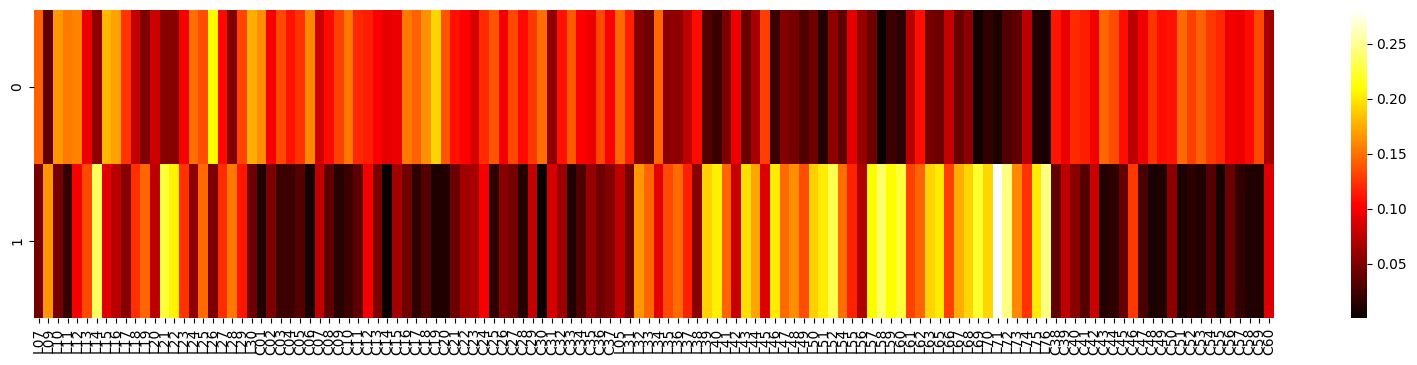

In [64]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_2[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_2_H_matrix' + new_run +'.png')

In [65]:
def cluster_assign_patients(H):

    H = np.array(H)
    patient_metaprotein_dict = {}
    test = {}

    for idx in range(len(H_2[0])):
        coef = H[: , idx]
        patient_cls = np.argmax(coef)
        patient_metaprotein_dict[patient_code[idx]] = patient_cls
        test[patient_code[idx]] = list(coef)

    return patient_metaprotein_dict

In [66]:
patient_clusters_2 = cluster_assign_patients(H_2)

In [67]:
# divinding the patients in their clusters (metaprotein)
def grouping_patients_for_cluster(patient_clusters):

    clustered_patient = {}

    for patient, cluster in patient_clusters.items():
        if cluster in clustered_patient.keys():
            clustered_patient[cluster].append(str(patient))
        else:
            clustered_patient[cluster] = [str(patient)]

    clustered_patient = dict(sorted(clustered_patient.items(), key=lambda x: int(x[0])))

    # print(patient_clusters)
    for cluster, patient in clustered_patient.items():
        print(f'Cluster(Metaprotein)_{cluster}: {patient} - N° of patients: {len(patient)} \n')

    

    return clustered_patient

In [68]:
clustered_patient_2 = grouping_patients_for_cluster(patient_clusters_2)

Cluster(Metaprotein)_0: ['L07', 'L10', 'L11', 'L12', 'L15', 'L16', 'L17', 'L20', 'L24', 'L26', 'L29', 'L30', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'L05', 'L31', 'L34', 'L38', 'L42', 'L45', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59'] - N° of patients: 75 

Cluster(Metaprotein)_1: ['L09', 'L13', 'L14', 'L18', 'L19', 'L21', 'L22', 'L23', 'L25', 'L27', 'L28', 'C31', 'L32', 'L33', 'L35', 'L36', 'L37', 'L39', 'L40', 'L41', 'L43', 'L44', 'L46', 'L47', 'L48', 'L49', 'L50', 'L51', 'L52', 'L54', 'L55', 'L56', 'L57', 'L58', 'L59', 'L60', 'L61', 'L62', 'L63', 'L65', 'L66', 'L67', 'L68', 'L69', 'L70', 'L71', 'L72', 'L73', 'L74', 'L75', 'L76', 'C46', 'C60'] - N° of patients: 53 



In [69]:
# Saving the clustered patients
f = open(results_dir + '/Rank_2_Clustered_patients' + new_run +'.txt', 'w')

for cluster, patient in clustered_patient_2.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

In [158]:
# for cluster, patients in clustered_patient_2.items():
#     print()
#     print(cluster)
#     print()
#     for pat in list(patients):
#         print(pat, end=', ')

In [70]:
# Function that will plot the clusters
def plotting_clusters(H, patient_clusters):

    fig, ax = plt.subplots(figsize=(8, 8))

    classes = ['Cluster_' + str(i) for i in range(len(H))]
    scatter = ax.scatter(H[0], H[1], c=list(patient_clusters.values()), s=100)
    ax.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=13, markerscale=1.5)

    for idx, label in enumerate(patient_code):
        ax.annotate(label, (H[0][idx], H[1][idx]), fontsize=8)

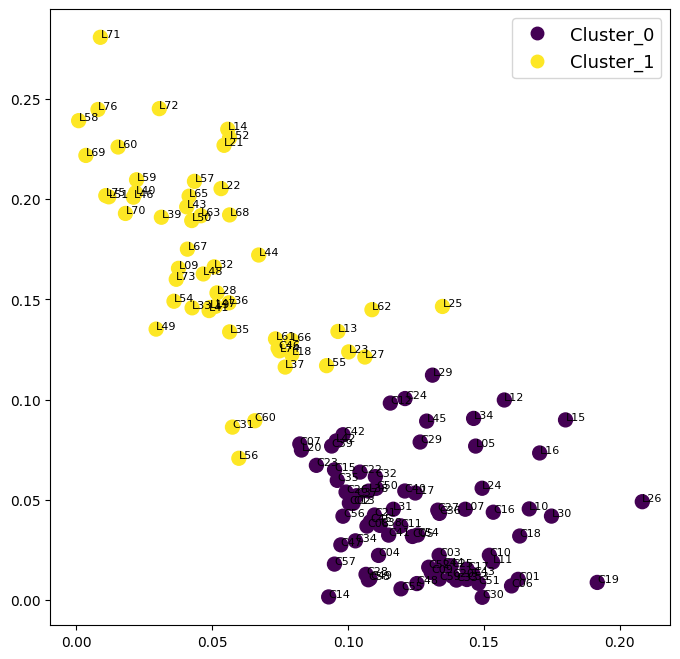

In [71]:
plotting_clusters(H_2, patient_clusters_2)

In [161]:
## Plotting the rank_2 patient clusters
#x = H_2[0]
#y = H_2[1]

#fig, ax = plt.subplots(figsize=(8, 8))

#labels = ['cluster_0', 'cluster_1']
#color = ['red', 'blue']

#label_0_lis_added = False
#label_1_lis_added = False
#label_0_coi_added = False
#label_1_coi_added = False

#for i in range(len(x)):
#    if patient_clusters_2[patient_code[i]] == 0:
#        col = color[0]
#        lab = labels[0]
#        if patient_code[i][0] == 'L':
#            marker = 'o'
#            if not label_0_lis_added:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Lisbon')
#                label_0_lis_added = True
#            else:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
#        if patient_code[i][0] != 'L':
#            marker = 's'
#            if not label_0_coi_added:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Coimbra')
#                label_0_coi_added = True
#            else:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
#    elif patient_clusters_2[patient_code[i]] == 1:
#        col = color[1]
#        lab = labels[1]
#        if patient_code[i][0] == 'L':
#            marker = 'o'
#            if not label_1_lis_added:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Lisbon')
#                label_1_lis_added = True
#            else:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
#        if patient_code[i][0] != 'L':
#            marker = 's'
#            if not label_1_coi_added:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Coimbra')
#                label_1_coi_added = True
#           else:
#                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
#ax.legend()

## Saving the plot
#plt.savefig(results_dir + '/Rank_2_Clustered_patients' + new_run +'.png')

### **Computing the Silhouette Score**

In [76]:
print(C_2)
print(list(patient_clusters_2.values()))
silhouette_score_2 = silhouette_score(np.asarray(C_2), list(patient_clusters_2.values()))
print(silhouette_score_2)

silhouette_results['Rank_2'] = silhouette_score_2

[[0.   0.98 0.14 ... 0.02 0.02 0.96]
 [0.98 0.   0.88 ... 1.   1.   0.02]
 [0.14 0.88 0.   ... 0.12 0.12 0.9 ]
 ...
 [0.02 1.   0.12 ... 0.   0.   0.98]
 [0.02 1.   0.12 ... 0.   0.   0.98]
 [0.96 0.02 0.9  ... 0.98 0.98 0.  ]]
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0.8615252084474759


In [77]:
def silhouette_plot(V, patient_clusters):

    silhouette_avg = silhouette_score(V.T, list(patient_clusters.values()))
    print('Silhouette average score:', silhouette_avg)
    
    # compute the silhouette score for each sample
    sample_silhouette_values = silhouette_samples(V.T, list(patient_clusters.values()))
    
    # extracting the cluster label from the patients
    cluster_labels = list(patient_clusters.values())
    
    # counting how many clusters
    n_cluster = len(Counter(list(patient_clusters.values())).keys())

    # creating a subplot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # ax.set_ylim([0, len(V.T) + (n_cluster + 1) * 10])

    y_lower = 10
    # iterating throug the number of clusters
    for i in range(n_cluster):

        # storing the silhouette score for the patients belonging to the ith cluster
        ith_cluster_silhouette_values = [score for idx, score in enumerate(sample_silhouette_values) if cluster_labels[idx] == i]
        
        # sorting the silhouette scores
        ith_cluster_silhouette_values.sort()

        y_upper = y_lower + len(ith_cluster_silhouette_values)

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        ith_cluster_silhouette_values, 0, alpha=0.8)

        ax.text(-0.3, y_lower + 0.5 * len(ith_cluster_silhouette_values), 'Cluster_' + str(i), fontsize=13) 

        # compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title('Silhouette plot for the Rank = ' + str(n_cluster), fontsize=20)
    ax.set_xlabel('The silhouette coefficient values', fontsize=12)
    ax.set_ylabel('Cluster labels', fontsize=12)

    # the vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    # setting ticks
    ax.set_yticks([])
    ax.set_xticks(np.arange(-1, 1, 0.1))
    # plt.tight_layout()

    # Saving the plot
    plt.savefig(results_dir + '/Rank_' + str(n_cluster) + '_Silhouette_plot' + new_run +'.png')

    plt.show()

Silhouette average score: 0.861525209690754


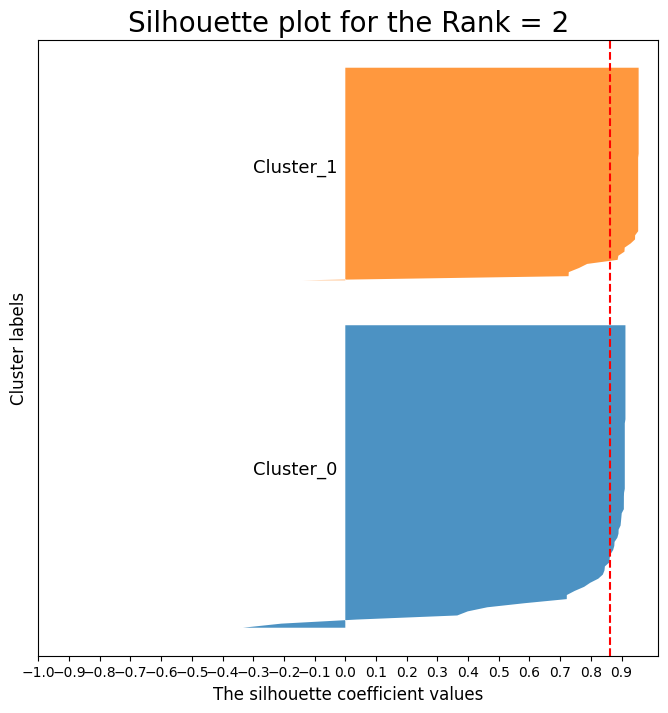

In [79]:
silhouette_plot(np.asarray(C_2), patient_clusters_2)

### **Explained Variance**

In [80]:
ex_var_best_fit, ex_var_random = {}, {}

In [81]:
# Explained Variance best fit
var_2 = nsnmf_2_fit.fit.evar()
print('Variance best model:', var_2)
ex_var_best_fit['Rank_2'] = var_2


# Explained Variance Random model
nsnmf_2_random = nimfa.Nsnmf(V, rank=2, n_run=1, max_iter=1)
nsnmf_2_random_fit = nsnmf_2_random()
var_2_random = nsnmf_2_random_fit.fit.evar()
print('Varince random model:', var_2_random)
ex_var_random['Rank_2'] = var_2_random

Variance best model: 0.9752191503875813
Varince random model: 0.18194856000533433


### Labelling (clustering) the proteins
#### Normalize the proteins expression levels of the V-matrix, computing the z-score, according to the control group

In [82]:
# Importing the A-beta negative dataset
#ab_neg_df = pd.read_excel('EMIF-AD_preprocessed_165proteins_MCI-SCI.xlsx', sheet_name='Amyloid_negatives', index_col=[0])
ab_neg_df = pd.read_excel('EMIF-AD_preprocessed_PLSDA_MCI.xlsx', sheet_name='Amyloid_negatives', index_col=[0])

# Storing the Uniprot code and dropping the row
uniprot_code_neg = list(ab_neg_df.columns)
ab_neg_df = ab_neg_df.drop(['Uniprot'])

# Transposing the matrix
ab_neg_df = ab_neg_df.T
# Storing the Patient code (columns index) and Protein-Entry code (rows index)
patient_code_neg = list(ab_neg_df.columns)
protein_code_neg = list(ab_neg_df.index)

# Generating the V numpy matrix
V_neg = np.array(ab_neg_df.values)

print(V_neg.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'EMIF-AD_preprocessed_PLSDA_MCI.xlsx'

In [169]:
print(f'The A-beta negative dataframe has dimension: \n {V_neg.shape[0]} rows (proteins) x {V_neg.shape[1]} columns (patients)')

ab_neg_df

The A-beta negative dataframe has dimension: 
 170 rows (proteins) x 102 columns (patients)


Patient,218,114,STO.041,152,THE016,MAA.1100,3538,MAA.1119,EDAR.LEU015,EDAR.ARI016,...,3197,MAA.1216,MAA.1066,MAA.1147,2591,3411,1832,115,MAA.1166,MAA001
APOB_HUMAN,0.234516,0.185586,0.146343,0.270699,0.131425,0.196329,0.24316,0.31873,0.187915,0.1833,...,0.379736,0.105526,0.226748,0.236895,0.235461,0.189228,0.084381,0.209518,0.122637,0.459958
CO3_HUMAN,0.720643,0.632311,0.388885,0.615594,0.141286,0.434702,0.565852,0.727827,0.508512,0.599232,...,1,0.33226,0.651319,0.538396,0.265097,0.488132,0.324059,0.70702,0.277876,0.769263
ALBU_HUMAN,0.645235,0.610218,0.477715,0.685463,0.411108,0.582764,0.816296,0.646177,0.382194,0.508299,...,0.982109,0.315382,0.861502,0.775906,0.563026,0.720013,0.478417,0.67755,0.375373,0.643708
TRFE_HUMAN,0.689977,0.444798,0.38764,0.721869,0.297462,0.579751,0.798541,0.54149,0.462567,0.557216,...,1,0.395126,0.754898,0.712211,0.452582,0.543695,0.446845,0.491892,0.33673,0.422351
FCGBP_HUMAN,0.406479,0.674169,0.539216,0.472783,0.392131,0.544194,0.296842,0.574589,0.202267,0.331595,...,0.599635,0.227555,0.56066,0.259042,0.590507,0.345128,0.410066,0.357592,0.33316,0.66782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LV746_HUMAN,0.76574,0.686011,0.480478,0.357588,0.353592,0.395209,0.520467,0.54569,0.460454,0.42905,...,0.707209,0.257462,0.590727,0.51825,0.517023,0.521929,0.339597,0.360391,0.410658,0.466173
LV316_HUMAN,0.495461,0.612781,0.563677,0.308435,0.222745,0.348757,0.406947,0.391365,0.364987,0.401699,...,0.585549,0.107093,0.690502,0.723844,0.296962,0.405017,0.395824,0.316067,0.396919,0.574752
KVD11_HUMAN,0.61563,0.616767,0.607594,0.480434,0.537087,0.550272,0.73007,0.569813,0.566975,0.445225,...,0.925175,0,0.854761,0.674122,0.508018,0.571307,0.438092,0.417493,0.464583,0.695394
TYB4_HUMAN,0.41796,0.719311,0.362289,0.51106,0.418529,0.732301,0.457469,0.457288,0.567212,0.597774,...,0.46189,0.603411,0.264455,0.389344,0.40901,0.61951,0.509097,0.434506,0.578738,0.427627


In [170]:
# Computing the mean and the SD for each of the proteins in the A-beta negative patients
mean_sd_prot_negative = {}

for idx, protein in enumerate(protein_code_neg):
    # Storing for each protein its mean and SD
    mean_sd_prot_negative[protein] = [np.mean(V_neg[idx]), np.std(V_neg[idx])]

# Computing the Z-score for each of the expression values in the A-beta positive matrix
z_score_matrix = []

for idx, protein in enumerate(protein_code):
    mean = mean_sd_prot_negative[protein][0]
    std = mean_sd_prot_negative[protein][1]
    # print(protein)
    # print(mean_sd_prot_negative[protein])
    print(V[idx])
    new_list = (V[idx] - mean) / std # (x - mean)/std
    z_score_matrix.append(new_list)

z_score_matrix = np.array(z_score_matrix)

z_score_df = pd.DataFrame(z_score_matrix, index=protein_code, columns=patient_code)

z_score_df

[0.5588961935861027 0.08047815932729545 0.1901316762660112
 0.4213306676678352 0.4876164842741956 0.18189331241947898
 0.1997601264902921 0.11789161611549158 0.21260645553705337
 0.29269930206784817 0.37738848342705084 0.0696565921490765
 0.2556746910831548 0.10123868706931227 0.5179614447431931
 0.16227226169486722 0.25613979124912495 0.08359148862245543
 0.2380188531421623 0.2076987531630156 0.295118671672016
 0.15145482848169597 0.18679732172978822 0.24979594422375445
 0.19672003927360437 0.10323735997395804 0.1393315595962477
 0.097031245869709 0.24830422903755453 0.16397654631380015
 0.1328427237482549 0.08269258464956826 0.19875340535161057
 0.23360885589620994 0.34141385287357345 0.14156807485904666
 0.14060657845712662 0.13755758662288503 0.16336452375486998
 0.20942043802525082 0.1776518050877503 0.14451646437831478
 0.1887066516037782 0.10872905432391866 0.24686623622735016
 0.144708687761814 0.15923585451679384 0.1316847930955244
 0.09496966642947931 0.21113056648335285 0.26

,EDAR.MAA030,EDAR.MAA005,MAA.737,3127,4150,5316,123,EDAR.COP009,3063,3722,...,3270,MAA.763,MAA.883,MAA.830,1796,5397,EDAR.MAA071,3152,170,2321
APOB_HUMAN,1.870675,-1.115723,-0.43124,1.011959,1.425731,-0.482666,-0.371137,-0.882179,-0.290947,0.209011,...,-0.64788,-0.576108,-0.038744,0.180209,-0.586558,-0.614575,-0.054076,2.098964,-0.687713,0.354248
CO3_HUMAN,0.381848,0.165506,-0.451003,-1.656705,0.92001,-0.936609,0.16761,-1.056765,0.027776,0.445422,...,-0.339444,-0.518697,1.097968,-0.933744,-0.538622,-0.702239,0.491435,-1.145575,-0.914851,-1.273219
ALBU_HUMAN,1.005551,-0.165105,-0.526369,-1.297956,0.472767,-0.881662,0.440177,-0.825794,0.428438,0.118767,...,-0.087639,-0.790857,0.800896,-1.168007,0.125912,-0.685916,0.395557,-0.887752,-1.060315,-1.32766
TRFE_HUMAN,0.640198,-2.149248,-1.047262,-2.354297,0.956814,-1.271924,0.10123,-1.272134,0.510394,1.007303,...,0.347094,-1.052698,0.807807,-1.192825,-0.791069,-1.917698,0.953049,-1.215247,-0.779503,-1.458865
FCGBP_HUMAN,0.72183,-0.888365,0.623234,0.313997,-0.957572,0.6244,0.076074,-0.754316,0.167426,-0.829568,...,-1.535419,-1.22285,0.996668,-0.599158,0.850992,0.485319,-0.456061,-1.995446,0.588996,-1.065278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LV746_HUMAN,0.713187,-0.354334,-0.902266,-0.793717,-0.791892,-1.337081,0.093005,-1.374347,-0.610003,0.0067,...,0.674384,0.507578,0.088597,-1.284994,0.450868,-1.320562,1.517192,-0.0128,-1.439531,-0.567979
LV316_HUMAN,0.31472,-0.482031,-1.334559,-1.896896,-0.003931,-0.89808,-0.519877,-0.181372,0.60108,-0.172845,...,1.263799,0.286904,-0.555318,-0.479916,0.963228,0.471418,0.316517,-0.090579,-0.990218,-0.157259
KVD11_HUMAN,-0.201152,0.012064,-0.730353,-0.464769,-0.91412,-1.295983,0.039097,-0.238843,0.90933,-0.345768,...,0.960507,-0.493114,-0.409134,-1.284557,-0.673126,-1.446888,0.509796,-0.215444,-0.860428,-0.631226
TYB4_HUMAN,0.271645,0.554973,0.473165,1.167126,0.994793,0.890402,0.775071,1.101077,0.974145,1.920156,...,0.38393,2.082876,1.920016,1.534833,0.17556,2.766499,1.370755,0.846192,0.982002,0.386962


In [171]:
z_score_df.to_excel(results_dir + '/z_score_proteins' + new_run +'.xlsx')

In [172]:
# Clustering the proteins according to both the highest average values and the NMF prediction method
def protein_clustering(nsnmf_model, patient_clusters, protein_code, V):

    ''' -------- Labelling the proteins with the NMF model ------------ '''
    protein_cluster_nmf = np.array(nsnmf_model.fit.predict(what='features'))
    protein_cluster_nmf = protein_cluster_nmf[0]


    ''' -------- Labelling the proteins according to which cluster showed the highest average level --------- '''
    mean_protein_val_cluster = {}

    # Storing for each protein its expression value for each patient that belong to a certain cluster
    for idx_pat, cluster in enumerate(list(patient_clusters.values())):
        for idx_prot, protein in enumerate(protein_code):
            expression_level = V[idx_prot, idx_pat]
            if cluster in mean_protein_val_cluster.keys():
                if protein in mean_protein_val_cluster[cluster].keys():
                    mean_protein_val_cluster[cluster][protein].append(expression_level)
                else:
                    mean_protein_val_cluster[cluster][protein] = [expression_level]
            else:
                mean_protein_val_cluster[cluster] = {str(protein): [expression_level]}

    # print(mean_protein_val_cluster)

    # computing the mean of each of the proteins
    for cluster in mean_protein_val_cluster.keys():
        for protein, val in mean_protein_val_cluster[cluster].items():
            mean_protein_val_cluster[cluster][protein] = [np.mean(val), np.std(val)] #str(np.mean(val)) + ' +/- ' + str(np.std(val))  
    
    # print(mean_protein_val_cluster)
    mean_protein_val_cluster = dict(sorted(mean_protein_val_cluster.items(), key= lambda x : x[0]))

    # assigning proteins to clusters according to the average mean value of the protein within the cluster
    protein_cluster_val = []

    for protein in protein_code:
        clusters = []
        means = []
        for clt in mean_protein_val_cluster.keys():
            clusters.append(clt)
            means.append(mean_protein_val_cluster[clt][protein][0])
        idx_max = means.index(np.max(means))
        protein_cluster_val.append(clusters[idx_max])

    # Generating the final dataframe
    clustered_proteins_df = pd.DataFrame(index = protein_code)

    for cluster, values in mean_protein_val_cluster.items():
        serie_to_append_mean = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 0], index=protein_code)
        serie_to_append_std = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 1], index=protein_code)
        clustered_proteins_df['Cluster_'+str(cluster)+'_Mean'] = serie_to_append_mean
        clustered_proteins_df['Std_'+str(cluster)] = serie_to_append_std

    # appending the cluster obtained from the highest average level of the proteins
    protein_cluster_val_series = pd.Series(protein_cluster_val, index=protein_code)
    clustered_proteins_df['Cluster with higher protein levels'] = protein_cluster_val_series
    # appendig the cluster obtained from the NMF protein clusterization
    protein_cluster_nmf_series = pd.Series(protein_cluster_nmf, index=protein_code)
    clustered_proteins_df['NMF protein cluster'] = protein_cluster_nmf_series

    return protein_cluster_nmf, np.array(protein_cluster_val), clustered_proteins_df

In [173]:
protein_cluster_nmf_2, protein_cluster_val_2, clustered_proteins_df_2 = protein_clustering(nsnmf_model=nsnmf_2_fit, patient_clusters=patient_clusters_2, protein_code=protein_code, V=z_score_matrix)

In [174]:
clustered_proteins_df_2

,Cluster_0_Mean,Std_0,Cluster_1_Mean,Std_1,Cluster with higher protein levels,NMF protein cluster
APOB_HUMAN,-0.165937,0.698165,-0.479135,0.639234,0,0
CO3_HUMAN,0.012492,0.634194,-0.962545,0.491205,0,0
ALBU_HUMAN,0.271186,0.508681,-0.914941,0.448221,0,0
TRFE_HUMAN,0.134611,0.759114,-1.041622,0.571475,0,0
FCGBP_HUMAN,-0.084806,0.942983,-0.557419,0.970292,0,1
...,...,...,...,...,...,...
LV746_HUMAN,0.072384,0.806514,-0.632599,0.797648,0,0
LV316_HUMAN,0.114989,0.758182,-0.660564,0.695860,0,0
KVD11_HUMAN,0.005951,0.604892,-0.654681,0.637032,0,0
TYB4_HUMAN,0.408825,0.950893,0.972790,0.940868,1,1


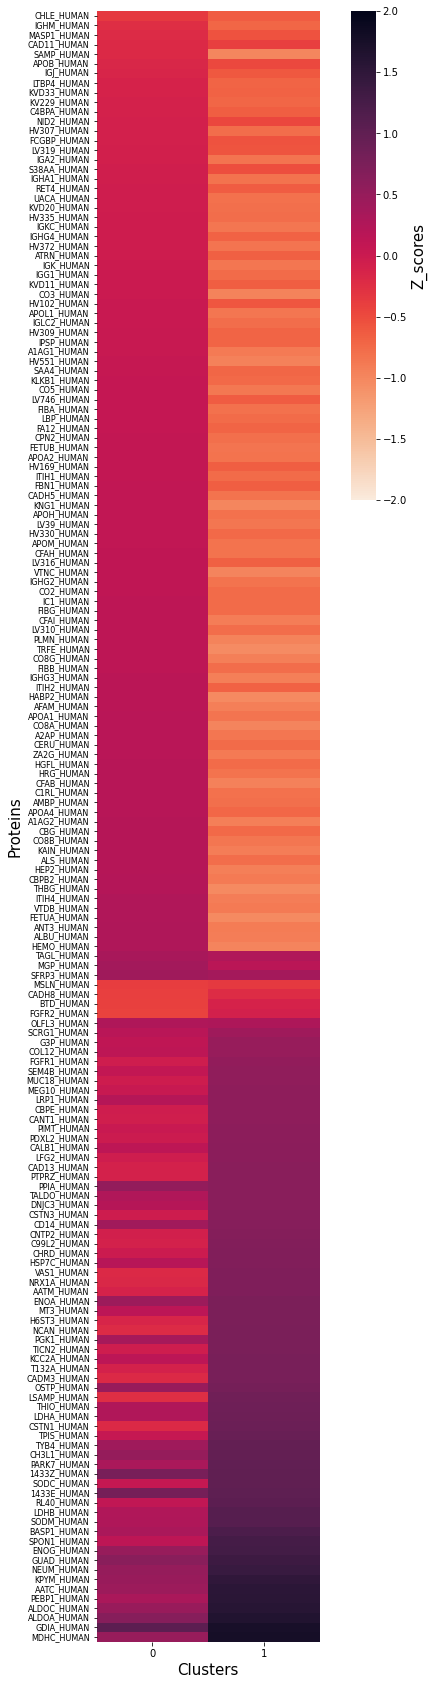

In [175]:
clustered_proteins_matrix_2 = clustered_proteins_df_2.values
clustered_proteins_matrix_means = []

for row in clustered_proteins_matrix_2:
    clustered_proteins_matrix_means.append(row[:-2:2]) 

clustered_proteins_matrix_means = np.array(clustered_proteins_matrix_means)
# clustered_proteins_matrix_means = np.array(sorted(clustere_proteins_matrix_means, key= lambda x:x[0], reverse=True))

# print(clustered_proteins_matrix_means.shape)
# print(protein_cluster_val_3)

sorted_proteins_for_cluster_0 = {}
sorted_proteins_for_cluster_1 = {}
#sorted_proteins_for_cluster_2 = {}

for idx, cluster in enumerate(protein_cluster_val_2):
    # print(cluster)
    # print(clustered_proteins_matrix_means[idx])
    if cluster == 0:
        sorted_proteins_for_cluster_0[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    if cluster == 1:
        sorted_proteins_for_cluster_1[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    #if cluster == 2:
    #    sorted_proteins_for_cluster_2[protein_code[idx]] = clustered_proteins_matrix_means[idx]

sorted_proteins_for_cluster_0 = dict(sorted(sorted_proteins_for_cluster_0.items(), key= lambda x : x[1][0]))
sorted_proteins_codes_0 = np.array(list(sorted_proteins_for_cluster_0.keys()))
sorted_proteins_values_0 = np.array(list(sorted_proteins_for_cluster_0.values()))
sorted_proteins_for_cluster_1 = dict(sorted(sorted_proteins_for_cluster_1.items(), key= lambda x : x[1][1]))
sorted_proteins_codes_1 = np.array(list(sorted_proteins_for_cluster_1.keys()))
sorted_proteins_values_1 = np.array(list(sorted_proteins_for_cluster_1.values()))
#sorted_proteins_for_cluster_2 = dict(sorted(sorted_proteins_for_cluster_2.items(), key= lambda x : x[1][2]))
#sorted_proteins_codes_2 = np.array(list(sorted_proteins_for_cluster_2.keys()))
#sorted_proteins_values_2 = np.array(list(sorted_proteins_for_cluster_2.values()))

total_sorted_proteins_val_for_cluster = np.concatenate((sorted_proteins_values_0, sorted_proteins_values_1), axis=0)
total_sorted_proteins_code_for_cluster = np.concatenate((sorted_proteins_codes_0, sorted_proteins_codes_1), axis = 0)

# print(total_sorted_proteins_val_for_cluster.shape)

# Generating the heatmap
fig = plt.figure(figsize=(5, 30))

ax = sns.heatmap(total_sorted_proteins_val_for_cluster, yticklabels=total_sorted_proteins_code_for_cluster, cmap='rocket_r', vmax=2, vmin=-2, cbar_kws={'location': 'right', 'anchor': (1.0, 1.0), 'shrink': 0.3, 'label': 'Z_scores'}) # RdBu_r
plt.yticks(fontsize=8)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Proteins', fontsize = 15)
ax.figure.axes[-1].yaxis.label.set_size(15)

# Saving the plot
plt.savefig(results_dir + '/Rank_2_Heatmap_clustered_proteins' + new_run +'.png')

In [176]:
# Sorting the clustered_proteins_df and save the matrix
sorted_clustered_proteins_df = clustered_proteins_df_2
sorted_clusterd_proteins_df = sorted_clustered_proteins_df.reindex(total_sorted_proteins_code_for_cluster)
# Saving the matrix
sorted_clusterd_proteins_df.to_excel(results_dir + '/Rank_2_Clustered_proteins' + new_run +'.xlsx')

Clustered protein for the NMF model:
 {'Cluster_0': 96, 'Cluster_1': 74}

Clustered protein for the average values:
 {'Cluster_0': 101, 'Cluster_1': 69}


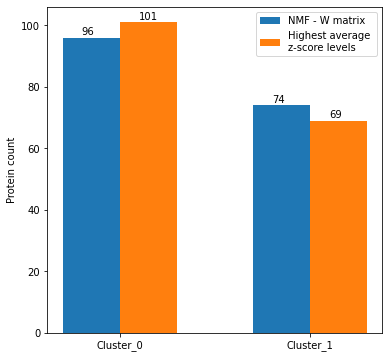

In [177]:
# Counting the number of proteins clusterized with NMF and with highest average levels

count_protein_for_cluster_nmf = {}

for cl in list(clustered_proteins_df_2['NMF protein cluster']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_nmf.keys():
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] += 1

count_protein_for_cluster_nmf = dict(sorted(count_protein_for_cluster_nmf.items(), key=lambda x:x[0]))

print('Clustered protein for the NMF model:\n', count_protein_for_cluster_nmf)
print()

count_protein_for_cluster_average = {}

for cl in list(clustered_proteins_df_2['Cluster with higher protein levels']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_average.keys():
        count_protein_for_cluster_average['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_average['Cluster_' + str(cl)] += 1

count_protein_for_cluster_average = dict(sorted(count_protein_for_cluster_average.items(), key=lambda x : x[0]))

print('Clustered protein for the average values:\n',count_protein_for_cluster_average)

# Plotting the cluster's protein counts

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()

nmf_prot = list(count_protein_for_cluster_nmf.keys())
val_prot = list(count_protein_for_cluster_average.keys())

width = 0.3
ind = np.arange(len(nmf_prot))

ax.bar(nmf_prot, list(count_protein_for_cluster_nmf.values()), width=width, label = 'NMF - W matrix')
ax.bar(ind + width, list(count_protein_for_cluster_average.values()), width=width, label = 'Highest average \nz-score levels')

ax.set_ylabel('Protein count')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(['Cluster_0', 'Cluster_1'])

# for i, v in (count_protein_for_cluster_nmf.items()):
#     print(idx)

nmf_count = list(count_protein_for_cluster_nmf.values())
val_count = list(count_protein_for_cluster_average.values())

for idx in range(len(nmf_prot)):
    ax.annotate(str(nmf_count[idx]), (idx - 0.05, nmf_count[idx] + 1))
    ax.annotate(str(val_count[idx]), (idx - 0.05 + width, val_count[idx] + 1))

ax.legend(loc='best');

# Saving the plot
plt.savefig(results_dir + '/Rank_2_Protein_clusters_NMF_zscore' + new_run +'.png')

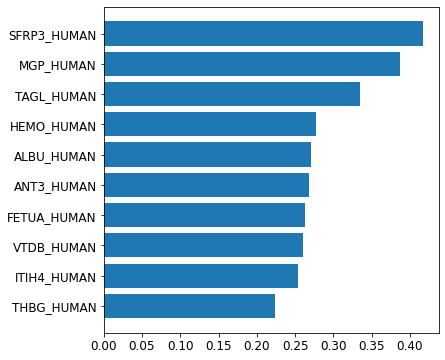

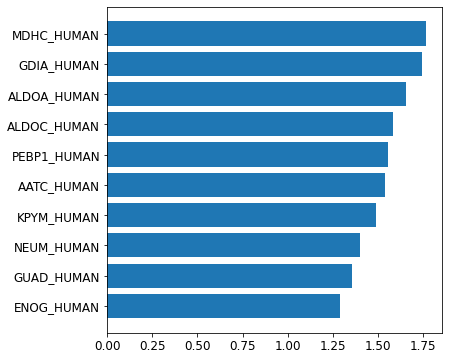

In [178]:
protein_clustered_val_2 = {'0': {}, '1': {}}
protein_clustered_std_2 = {'0': {}, '1': {}}

average_protein_level_clusters = np.array(clustered_proteins_df_2.values)

for idx, protein in enumerate(protein_code):
    cl_prot = str(protein_cluster_val_2[idx])
    # max_exp_level_mean = np.max(average_protein_level_clusters[idx, : ][:-2:2])
    list_mean_std = average_protein_level_clusters[idx, : ][:-2]
    mean_list = list(list_mean_std[::2])
    std_list = list(list_mean_std[1::2])
    idx_max = mean_list.index(np.max(mean_list))
    max_exp_level_mean = mean_list[idx_max]
    max_exp_level_std = std_list[idx_max]
    protein_clustered_val_2[str(cl_prot)][str(protein)] = max_exp_level_mean
    protein_clustered_std_2[str(cl_prot)][str(protein)] = max_exp_level_std
    

# cluster = '0' # Changing the number of the cluster for which you want to see the highest expressed proteins

for cluster in  ['0', '1']:
    protein_cluster = list(protein_clustered_val_2[cluster].keys())
    protein_val = list(protein_clustered_val_2[cluster].values())
    protein_std = list(protein_clustered_std_2[cluster].values())
    sorted_idx = np.argsort(protein_val)[::-1]
    # print(sorted_idx)

    # for idx in sorted_idx:
    #     print(protein_cluster[idx], end='\n\n')

    fig, ax = plt.subplots(figsize=(6, 6))

    first_ten = sorted_idx[:10][::-1]
    # print(first_ten)
    # protein_cluster_first_ten = [prot for prot in protein_cluster[first_ten]]
    protein_cluster_first = []
    protein_val_first = []
    # protein_std_first = []
    for idx in first_ten:
        protein_cluster_first.append(protein_cluster[idx])
        protein_val_first.append(protein_val[idx])
        # protein_std_first.append(protein_std[idx])

    # protein_std_first = [5 for i in range(len(protein_std_first))]

    ax.barh(protein_cluster_first, protein_val_first, capsize=5) #xerr=protein_std_first
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12);

    plt.savefig(results_dir + '/Rank_2_Protein_cluster_' + cluster + '' + new_run +'.png', bbox_inches = "tight")

In [179]:
# print(protein_clustered_val_2)

for cluster in ['0', '1']:

    df_prot_zscore = pd.DataFrame(columns=['protein', 'z_score'])

    i = 0

    for prot, val in protein_clustered_val_2[cluster].items():
        list_to_append = [prot, val]
        df_prot_zscore.loc[i] = list_to_append
        i += 1

    df_prot_zscore = df_prot_zscore.sort_values('z_score', ignore_index=True, ascending=False)

    # Saving in an excel file
    df_prot_zscore.to_excel(results_dir + '/Rank_2_Protein_cluster_' + cluster + '_2' + new_run +'.xlsx')

In [180]:
protein_clusters_dict_2 = {}

for idx, cl in enumerate(protein_cluster_val_2):
    if cl not in protein_clusters_dict_2.keys():
        protein_clusters_dict_2[cl] = [protein_code[idx]]
    else:
        protein_clusters_dict_2[cl].append(protein_code[idx])

protein_clusters_dict_2 = dict(sorted(protein_clusters_dict_2.items(), key=lambda x:x[0]))

In [181]:
file = open(results_dir + '/Rank_2_Clustered_proteins' + new_run + '.txt', 'w')

for cl, proteins in protein_clusters_dict_2.items():
    print(f'Cluster_{cl}:')
    file.write(f'Cluster_{cl}:\n')
    print(f'{proteins} - number of proteins: {len(proteins)}')
    file.write(f'{proteins} - number of proteins: {len(proteins)}\n')

file.close()

Cluster_0:
['APOB_HUMAN', 'CO3_HUMAN', 'ALBU_HUMAN', 'TRFE_HUMAN', 'FCGBP_HUMAN', 'CFAH_HUMAN', 'CERU_HUMAN', 'PLMN_HUMAN', 'CO5_HUMAN', 'KNG1_HUMAN', 'CFAB_HUMAN', 'VTDB_HUMAN', 'FIBB_HUMAN', 'APOA4_HUMAN', 'FIBA_HUMAN', 'ITIH4_HUMAN', 'ANT3_HUMAN', 'IGG1_HUMAN', 'CO2_HUMAN', 'AFAM_HUMAN', 'LTBP4_HUMAN', 'HEMO_HUMAN', 'FIBG_HUMAN', 'HRG_HUMAN', 'ITIH1_HUMAN', 'APOA1_HUMAN', 'CFAI_HUMAN', 'FBN1_HUMAN', 'IGHG3_HUMAN', 'IGHG2_HUMAN', 'ITIH2_HUMAN', 'NID2_HUMAN', 'APOH_HUMAN', 'HEP2_HUMAN', 'KLKB1_HUMAN', 'IGHA1_HUMAN', 'IGK_HUMAN', 'CO8B_HUMAN', 'IGHM_HUMAN', 'ATRN_HUMAN', 'FETUA_HUMAN', 'CO8A_HUMAN', 'KAIN_HUMAN', 'ZA2G_HUMAN', 'AMBP_HUMAN', 'A2AP_HUMAN', 'IGA2_HUMAN', 'IC1_HUMAN', 'THBG_HUMAN', 'IGKC_HUMAN', 'VTNC_HUMAN', 'IGHG4_HUMAN', 'ALS_HUMAN', 'C4BPA_HUMAN', 'S38AA_HUMAN', 'RET4_HUMAN', 'IPSP_HUMAN', 'MASP1_HUMAN', 'A1AG1_HUMAN', 'FA12_HUMAN', 'HABP2_HUMAN', 'A1AG2_HUMAN', 'TAGL_HUMAN', 'CBG_HUMAN', 'IGLC2_HUMAN', 'CAD11_HUMAN', 'CO8G_HUMAN', 'FETUB_HUMAN', 'LBP_HUMAN', 'C1RL_HUM

In [182]:
file = open(results_dir + '/Rank_2_Clustered_proteins_for_comparison' + new_run + '.txt', 'w')

for cl, proteins in protein_clusters_dict_2.items():
    for prot in proteins: 
        file.write(f'{prot} \t {cl} \n')

file.close()

## **Rank = 3**

In [183]:
# Building the model with rank = 3
nsnmf_3 = nimfa.Nsnmf(V, rank=3, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                      track_factor=True, track_error=True, update='divergence', objective='div')
nsnmf_3_fit = nsnmf_3()

In [184]:
len(nsnmf_3_fit.fit.tracker.get_error())

1000

In [185]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_3 = nsnmf_3_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_3)

cophonetic_results['Rank_3'] = cophonetic_cor_coef_3

Cophenetic correlation coefficient: 0.9367468140636356


### **Consensus matrix**

C:\Users\haidos\AppData\Local\Temp\ipykernel_19936\1965680007.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



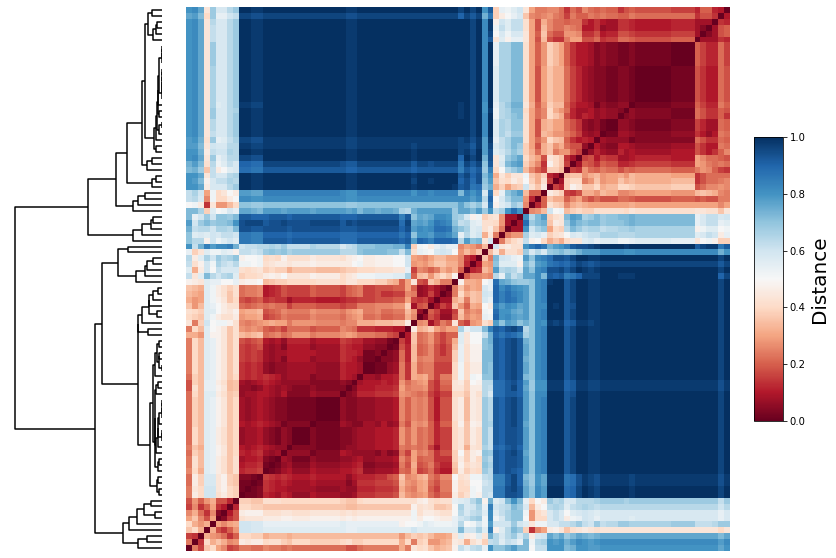

In [186]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_3 = 1- nsnmf_3_fit.fit.consensus()
Y = sch.linkage(C_3, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_3[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
# plt.savefig(results_dir + '/Rank_3_Consensus_matrix' + new_run +'.png')

### **W matrix**

In [187]:
# Computing the W basis matrix
W_3 = nsnmf_3_fit.fit.basis()

print(f'The shape of the W matrix is: {W_3.shape[0]} rows (proteins) x {W_3.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 170 rows (proteins) x 3 columns (metaproteins)


Text(0.5, 1.0, 'W matrix')

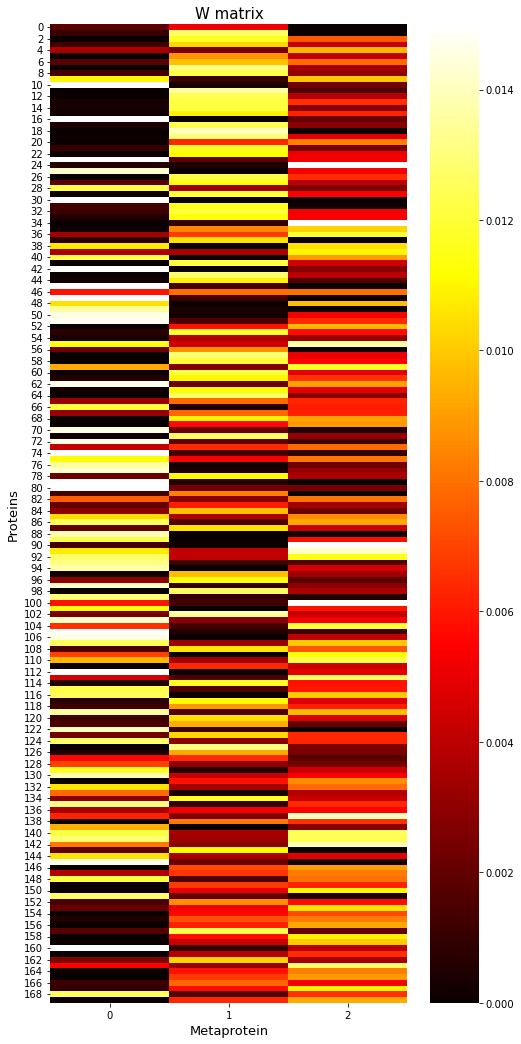

In [188]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_3[: , : ], cmap='hot', vmax=0.015) #Try without setting vmax
plt.ylabel('Proteins', fontsize=13)
plt.xlabel('Metaprotein', fontsize=13)
plt.title('W matrix', fontsize=15)

# Saving the plot
# plt.savefig(results_dir + '/Rank_3_W_matrix' + new_run +'.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [189]:
prot_clusters_dict_3 = k_proteins_of_metaprotein(W_3, 3)

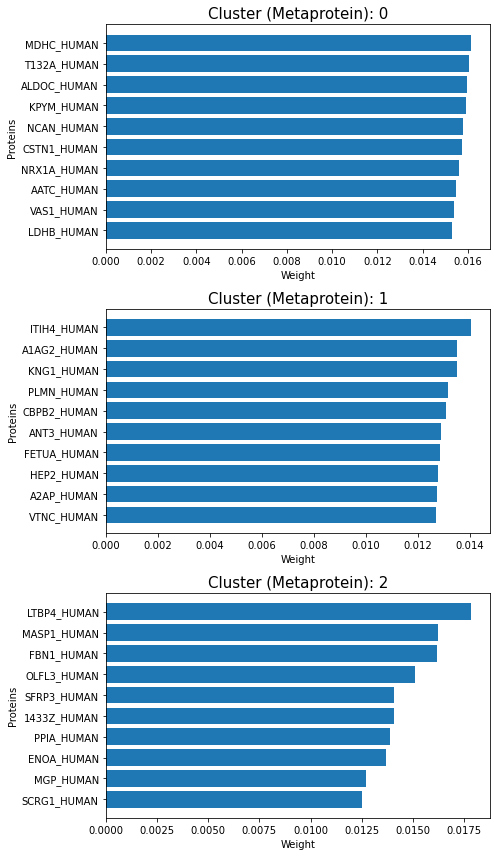

In [190]:
plotting_metaproteins(prot_clusters_dict_3)

### **H matrix**

In [191]:
# Computing the H coef matrix
H_3 = np.array(nsnmf_3_fit.fit.coef())

print(f'The shape of the H matrix is: {H_3.shape[0]} rows (metaprotein) x {H_3.shape[1]} columns (patients)')

The shape of the H matrix is: 3 rows (metaprotein) x 92 columns (patients)


Text(0.5, 15.0, 'Patients')

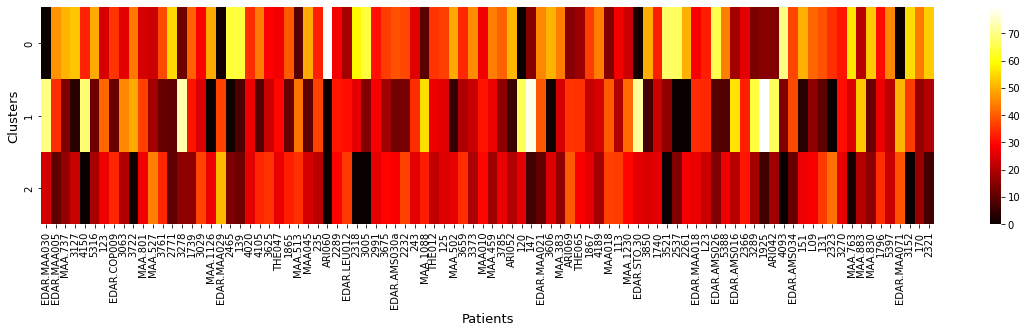

In [192]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_3[: , : ], cmap='hot', xticklabels=patient_code) 
plt.ylabel('Clusters', fontsize=13)
plt.xlabel('Patients', fontsize=13)

# Saving the plot
# plt.savefig(results_dir + '/Rank_3_H_matrix' + new_run +'.png')

In [193]:
patient_clusters_3 = cluster_assign_patients(H_3)

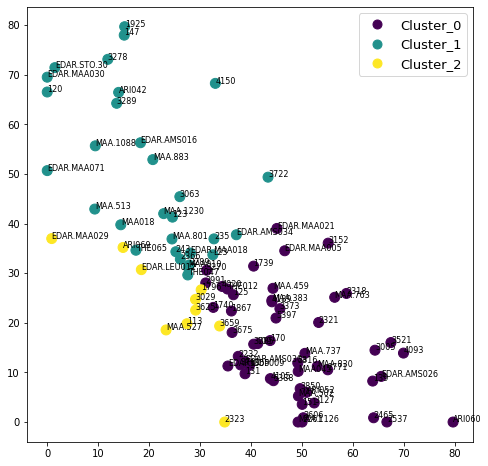

In [194]:
plotting_clusters(H_3,patient_clusters_3)

In [195]:
clustered_patient_3 = grouping_patients_for_cluster(patient_clusters_3)

Cluster(Metaprotein)_0: ['EDAR.MAA005', 'MAA.737', '3127', '5316', 'EDAR.COP009', '3761', '2771', '1739', 'MAA.1126', '2465', '139', '4020', '4105', '1865', 'MAA045', 'ARI060', '2318', '3005', '2991', '3675', 'EDAR.AMS030a', '2232', 'THE012', '125', 'MAA.502', '3373', 'MAA.459', '3785', 'ARI052', 'EDAR.MAA021', '3606', 'MAA.383', '1867', '4189', '3850', '1740', '3521', '2537', '2261', 'EDAR.AMS026', '5388', '4093', '151', 'L09', '131', '3270', 'MAA.763', 'MAA.830', '5397', '3152', '170', '2321'] - N° of patients: 52 

Cluster(Metaprotein)_1: ['EDAR.MAA030', '4150', '123', '3063', '3722', 'MAA.801', '3278', 'THE047', 'MAA.513', '235', '2289', '243', 'MAA.1088', 'MAA010', '120', '147', 'THE065', 'MAA018', 'MAA.1230', 'EDAR.STO.30', 'EDAR.MAA018', 'L23', 'EDAR.AMS016', '2366', '3289', '1925', 'ARI042', 'EDAR.AMS034', 'MAA.883', 'EDAR.MAA071'] - N° of patients: 30 

Cluster(Metaprotein)_2: ['MAA.527', '3029', 'EDAR.MAA029', '3625', 'EDAR.LEU012', '3659', 'ARI069', '113', '2323', '1796'] - 

In [196]:
# Saving the clustered patients
f = open(results_dir + '/Rank_3_Clustered_patients' + new_run +'.txt', 'w')

for cluster, patient in clustered_patient_3.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

Cluster 0 - Lisbon: 1
Cluster 0 - Coimbra: 51
Cluster 1 - Lisbon: 1
Cluster 1 - Coimbra: 29
Cluster 2 - Lisbon: 0
Cluster 2 - Coimbra: 10

For a total of 92 patients


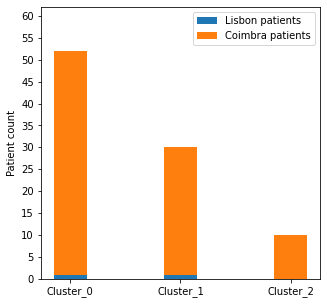

In [197]:
count_lisbon_pats = {}
count_coimbra_pats = {}
tot = 0

# Counting the patients
for cl, patients in clustered_patient_3.items():
    lis_tot = 0
    coi_tot = 0
    for pat in patients:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    count_lisbon_pats[cl] = lis_tot
    count_coimbra_pats[cl] = coi_tot
    tot = tot + lis_tot + coi_tot
    
    print(f'Cluster {cl} - Lisbon: {lis_tot}')
    print(f'Cluster {cl} - Coimbra: {coi_tot}')
print()
print(f'For a total of {tot} patients')

count_lisbon_pats = dict(sorted(count_lisbon_pats.items(), key=lambda x:x[0]))
count_coimbra_pats = dict(sorted(count_coimbra_pats.items(), key=lambda x:x[0]))

max_list = []
for cl, count_pat in count_lisbon_pats.items():
    max_list.append(count_pat + count_coimbra_pats[cl])

# plotting
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

count_lis = list(count_lisbon_pats.values())
count_coi = list(count_coimbra_pats.values())

ax.bar(list(count_lisbon_pats.keys()), count_lis, width = 0.3, label='Lisbon patients')
ax.bar(list(count_coimbra_pats.keys()), count_coi, bottom=count_lis, width=0.3, label='Coimbra patients')

ax.set_ylim(0, np.max(max_list) + 10)
ax.set_xticks(range(len(count_lis)))
ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])
ax.set_ylabel('Patient count')
ax.set_yticks(np.arange(0, np.max(max_list) + 10, step = 5.0))
ax.legend()

# Saving the plot 
plt.savefig(results_dir + '/Rank_3_Cluster_cohorts' + new_run +'.png')

### **H matrix 3D plot**

In [198]:
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

# legend_elements = [Line2D([0], [0], color='w', markerfacecolor=colors[0], marker ='o', label='Cluster_0, Lisbon', markersize = 10), 
#                    Line2D([0], [0], color='w', markerfacecolor=colors[0], marker ='s', label='Cluster_0, Coimbra', markersize = 10),
#                    Line2D([0], [0], color='w', markerfacecolor=colors[1], marker ='o', label='Cluster_1, Lisbon', markersize = 10),
#                    Line2D([0], [0], color='w', markerfacecolor=colors[1], marker ='s', label='Cluster_1, Coimbra', markersize = 10),
#                    Line2D([0], [0], color='w', markerfacecolor=colors[2], marker ='o', label='Cluster_2, Lisbon', markersize = 10),
#                    Line2D([0], [0], color='w', markerfacecolor=colors[2], marker ='s', label='Cluster_2, Coimbra', markersize = 10)]

# # Alpha for the shading
# xmin = min(H_3[0])
# ymin = min(H_3[1])
# x_range = np.max(H_3[0]) - xmin
# y_range = np.max(H_3[1]) - ymin

# # legend_labels = []

# clusters = ['Cluster_0', 'Cluster_1', 'Cluster_2']

# for cl, patients in clustered_patient_3.items():
#     label_lis_added = False
#     label_coi_added = False
#     # print(cl, patient)
#     for pat in patients:
#         idx_pat = patient_code.index(pat)
#         x = H_3[0, idx_pat]
#         y = H_3[1, idx_pat]
#         z = H_3[2, idx_pat]
#         cxalpha = 0.4 * ((x - xmin) / x_range)
#         cyaplha = 0.4 - 0.4 * ((y - ymin) / y_range)
#         alpha = cxalpha + cyaplha + 0.2 # minimum alpha 0.2
#         label = clusters[cl]
#         color = colors[cl]
#         if pat[0] == 'L':
#             marker = 'o'
#             ax.scatter3D(x, y, z, color=color, alpha=alpha, marker=marker , s=90)
#         else:
#             marker = 's'
#             ax.scatter3D(x, y, z, color=color, label=label + ', Coimbra', alpha=alpha, marker=marker, depthshade=True, s=90)
# plt.legend(handles=legend_elements, loc='best')     
# ax.set_xlabel('Metaprotein_0')
# ax.set_ylabel('Metaprotein_1')
# ax.set_zlabel('Metaprotein_2')

In [199]:
# INTERACTIVE

df_plot_3 = pd.DataFrame(columns=['patient_cluster', 'patient', 'Subtype_0', 'Subtype_1', 'Subtype_2'])
for idx, patient in enumerate(patient_code):
#     if patient[0] == 'L':
#         cohort = 'Lisbon'
#     else:
#         cohort = 'Coimbra'
    list_to_append = [int(patient_clusters_3[patient])] + [patient] + list(H_3[: , idx])
    df_plot_3.loc[idx] = list_to_append
df_plot_3

# plotly.offline.init_notebook_mode()
fig = px.scatter_3d(df_plot_3, x='Subtype_0', y='Subtype_1', z='Subtype_2', 
                    color='patient_cluster',    
                    size_max=0.1, 
                    hover_name='patient')

fig.update_traces(marker=dict(size=7))
fig.update_layout(
    autosize=True,
    width=1000,
    height=1000,)

fig.write_image(results_dir + '/Rank_3_Clustered_patients' + new_run +'.png')
fig.write_html(results_dir + '/Rank_3_Clustered_patients' + new_run +'.html')

fig.show()

### **Computing the Silhouette Score**

In [200]:
silhouette_score_3 = silhouette_score(C_3, list(patient_clusters_3.values()))
print(silhouette_score_3)

silhouette_results['Rank_3'] = silhouette_score_3

0.5983591326327081


C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Silhouette average score: 0.5983591330429309


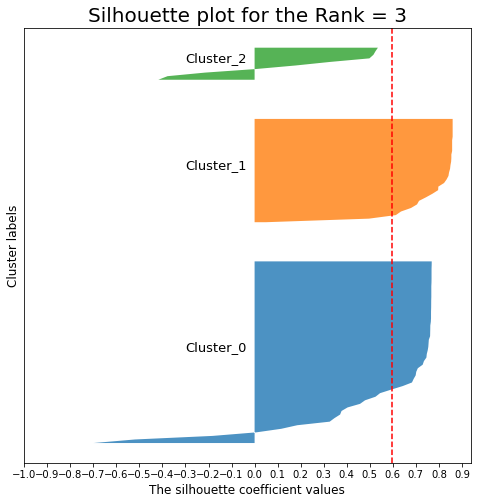

In [201]:
silhouette_plot(C_3, patient_clusters_3)

### **Explained Variance**

In [202]:
# Explained Variance best fit
var_3 = nsnmf_3_fit.fit.evar()
print('Variance best model:', var_3)
ex_var_best_fit['Rank_3'] = var_3

# Explained Variance Random model
nsnmf_3_random = nimfa.Nsnmf(V, rank=3, n_run=1, max_iter=1)
nsnmf_3_random_fit = nsnmf_3_random()
var_3_random = nsnmf_3_random_fit.fit.evar()
print('Variance random model:', var_3_random)
ex_var_random['Rank_3'] = var_3_random

Variance best model: 0.9625928646445212
Variance random model: 0.020975618918025463


### **Labelling (clustering) the proteins**

#### **Normalize the proteins expression levels of the V-matrix, computing the Z-score, according to the control group**

The Z-score is computed with the formula $Z = \frac{x - \mu}{\delta}$,  Where:   
- $x$ is the expression level of that protein in that specific A-beta positve patient
- $\mu$ is the mean of that protein in all the A-beta negative patients (control patients)
- $\delta$ is the standard deviation of that protein over all the expression levels in all the A-beta negative patients (control patients)

In [203]:
# Importing the A-beta negative dataset
#ab_neg_df = pd.read_excel('EMIF-AD_preprocessed_165proteins_MCI-SCI.xlsx', sheet_name='Amyloid_negatives', index_col=[0])
ab_neg_df = pd.read_excel('EMIF-AD_preprocessed_PLSDA_MCI.xlsx', sheet_name='Amyloid_negatives', index_col=[0])

# Storing the Uniprot code and dropping the row
uniprot_code_neg = list(ab_neg_df.columns)
ab_neg_df = ab_neg_df.drop(['Uniprot'])

# Transposing the matrix
ab_neg_df = ab_neg_df.T
# Storing the Patient code (columns index) and Protein-Entry code (rows index)
patient_code_neg = list(ab_neg_df.columns)
protein_code_neg = list(ab_neg_df.index)

# Generating the V numpy matrix
V_neg = np.array(ab_neg_df.values)

print(V_neg.shape)

(170, 102)


In [204]:
print(f'The A-beta negative dataframe has dimension: \n {V_neg.shape[0]} rows (proteins) x {V_neg.shape[1]} columns (patients)')

ab_neg_df

The A-beta negative dataframe has dimension: 
 170 rows (proteins) x 102 columns (patients)


Patient,218,114,STO.041,152,THE016,MAA.1100,3538,MAA.1119,EDAR.LEU015,EDAR.ARI016,...,3197,MAA.1216,MAA.1066,MAA.1147,2591,3411,1832,115,MAA.1166,MAA001
APOB_HUMAN,0.234516,0.185586,0.146343,0.270699,0.131425,0.196329,0.24316,0.31873,0.187915,0.1833,...,0.379736,0.105526,0.226748,0.236895,0.235461,0.189228,0.084381,0.209518,0.122637,0.459958
CO3_HUMAN,0.720643,0.632311,0.388885,0.615594,0.141286,0.434702,0.565852,0.727827,0.508512,0.599232,...,1,0.33226,0.651319,0.538396,0.265097,0.488132,0.324059,0.70702,0.277876,0.769263
ALBU_HUMAN,0.645235,0.610218,0.477715,0.685463,0.411108,0.582764,0.816296,0.646177,0.382194,0.508299,...,0.982109,0.315382,0.861502,0.775906,0.563026,0.720013,0.478417,0.67755,0.375373,0.643708
TRFE_HUMAN,0.689977,0.444798,0.38764,0.721869,0.297462,0.579751,0.798541,0.54149,0.462567,0.557216,...,1,0.395126,0.754898,0.712211,0.452582,0.543695,0.446845,0.491892,0.33673,0.422351
FCGBP_HUMAN,0.406479,0.674169,0.539216,0.472783,0.392131,0.544194,0.296842,0.574589,0.202267,0.331595,...,0.599635,0.227555,0.56066,0.259042,0.590507,0.345128,0.410066,0.357592,0.33316,0.66782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LV746_HUMAN,0.76574,0.686011,0.480478,0.357588,0.353592,0.395209,0.520467,0.54569,0.460454,0.42905,...,0.707209,0.257462,0.590727,0.51825,0.517023,0.521929,0.339597,0.360391,0.410658,0.466173
LV316_HUMAN,0.495461,0.612781,0.563677,0.308435,0.222745,0.348757,0.406947,0.391365,0.364987,0.401699,...,0.585549,0.107093,0.690502,0.723844,0.296962,0.405017,0.395824,0.316067,0.396919,0.574752
KVD11_HUMAN,0.61563,0.616767,0.607594,0.480434,0.537087,0.550272,0.73007,0.569813,0.566975,0.445225,...,0.925175,0,0.854761,0.674122,0.508018,0.571307,0.438092,0.417493,0.464583,0.695394
TYB4_HUMAN,0.41796,0.719311,0.362289,0.51106,0.418529,0.732301,0.457469,0.457288,0.567212,0.597774,...,0.46189,0.603411,0.264455,0.389344,0.40901,0.61951,0.509097,0.434506,0.578738,0.427627


In [205]:
# mean = np.mean(list(ab_neg_df.loc['DPP6_HUMAN', :]))
# print(mean)
# sd = np.std(list(ab_neg_df.loc['DPP6_HUMAN', :]))
# print(sd)
# val = ab_pos_df.loc['DPP6_HUMAN', 'L33']
# print(val)

# print((val - mean) / sd)

In [206]:
# Computing the mean and the SD for each of the proteins in the A-beta negative patients
mean_sd_prot_negative = {}

for idx, protein in enumerate(protein_code_neg):
    # Storing for each protein its mean and SD
    mean_sd_prot_negative[protein] = [np.mean(V_neg[idx]), np.std(V_neg[idx])]

# Computing the Z-score for each of the expression values in the A-beta positive matrix
z_score_matrix = []

for idx, protein in enumerate(protein_code):
    mean = mean_sd_prot_negative[protein][0]
    std = mean_sd_prot_negative[protein][1]
    # print(protein)
    # print(mean_sd_prot_negative[protein])
    print(V[idx])
    new_list = (V[idx] - mean) / std # (x - mean)/std
    z_score_matrix.append(new_list)

z_score_matrix = np.array(z_score_matrix)

z_score_df = pd.DataFrame(z_score_matrix, index=protein_code, columns=patient_code)

z_score_df

[0.5588961935861027 0.08047815932729545 0.1901316762660112
 0.4213306676678352 0.4876164842741956 0.18189331241947898
 0.1997601264902921 0.11789161611549158 0.21260645553705337
 0.29269930206784817 0.37738848342705084 0.0696565921490765
 0.2556746910831548 0.10123868706931227 0.5179614447431931
 0.16227226169486722 0.25613979124912495 0.08359148862245543
 0.2380188531421623 0.2076987531630156 0.295118671672016
 0.15145482848169597 0.18679732172978822 0.24979594422375445
 0.19672003927360437 0.10323735997395804 0.1393315595962477
 0.097031245869709 0.24830422903755453 0.16397654631380015
 0.1328427237482549 0.08269258464956826 0.19875340535161057
 0.23360885589620994 0.34141385287357345 0.14156807485904666
 0.14060657845712662 0.13755758662288503 0.16336452375486998
 0.20942043802525082 0.1776518050877503 0.14451646437831478
 0.1887066516037782 0.10872905432391866 0.24686623622735016
 0.144708687761814 0.15923585451679384 0.1316847930955244
 0.09496966642947931 0.21113056648335285 0.26

,EDAR.MAA030,EDAR.MAA005,MAA.737,3127,4150,5316,123,EDAR.COP009,3063,3722,...,3270,MAA.763,MAA.883,MAA.830,1796,5397,EDAR.MAA071,3152,170,2321
APOB_HUMAN,1.870675,-1.115723,-0.43124,1.011959,1.425731,-0.482666,-0.371137,-0.882179,-0.290947,0.209011,...,-0.64788,-0.576108,-0.038744,0.180209,-0.586558,-0.614575,-0.054076,2.098964,-0.687713,0.354248
CO3_HUMAN,0.381848,0.165506,-0.451003,-1.656705,0.92001,-0.936609,0.16761,-1.056765,0.027776,0.445422,...,-0.339444,-0.518697,1.097968,-0.933744,-0.538622,-0.702239,0.491435,-1.145575,-0.914851,-1.273219
ALBU_HUMAN,1.005551,-0.165105,-0.526369,-1.297956,0.472767,-0.881662,0.440177,-0.825794,0.428438,0.118767,...,-0.087639,-0.790857,0.800896,-1.168007,0.125912,-0.685916,0.395557,-0.887752,-1.060315,-1.32766
TRFE_HUMAN,0.640198,-2.149248,-1.047262,-2.354297,0.956814,-1.271924,0.10123,-1.272134,0.510394,1.007303,...,0.347094,-1.052698,0.807807,-1.192825,-0.791069,-1.917698,0.953049,-1.215247,-0.779503,-1.458865
FCGBP_HUMAN,0.72183,-0.888365,0.623234,0.313997,-0.957572,0.6244,0.076074,-0.754316,0.167426,-0.829568,...,-1.535419,-1.22285,0.996668,-0.599158,0.850992,0.485319,-0.456061,-1.995446,0.588996,-1.065278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LV746_HUMAN,0.713187,-0.354334,-0.902266,-0.793717,-0.791892,-1.337081,0.093005,-1.374347,-0.610003,0.0067,...,0.674384,0.507578,0.088597,-1.284994,0.450868,-1.320562,1.517192,-0.0128,-1.439531,-0.567979
LV316_HUMAN,0.31472,-0.482031,-1.334559,-1.896896,-0.003931,-0.89808,-0.519877,-0.181372,0.60108,-0.172845,...,1.263799,0.286904,-0.555318,-0.479916,0.963228,0.471418,0.316517,-0.090579,-0.990218,-0.157259
KVD11_HUMAN,-0.201152,0.012064,-0.730353,-0.464769,-0.91412,-1.295983,0.039097,-0.238843,0.90933,-0.345768,...,0.960507,-0.493114,-0.409134,-1.284557,-0.673126,-1.446888,0.509796,-0.215444,-0.860428,-0.631226
TYB4_HUMAN,0.271645,0.554973,0.473165,1.167126,0.994793,0.890402,0.775071,1.101077,0.974145,1.920156,...,0.38393,2.082876,1.920016,1.534833,0.17556,2.766499,1.370755,0.846192,0.982002,0.386962


In [207]:
z_score_df.to_excel(results_dir + '/z_score_proteins' + new_run +'.xlsx')

#### Clustering the proteins

In [208]:
# Clustering the proteins according to both the highest average values and the NMF prediction method
def protein_clustering(nsnmf_model, patient_clusters, protein_code, V):

    ''' -------- Labelling the proteins with the NMF model ------------ '''
    protein_cluster_nmf = np.array(nsnmf_model.fit.predict(what='features'))
    protein_cluster_nmf = protein_cluster_nmf[0]


    ''' -------- Labelling the proteins according to which cluster showed the highest average level --------- '''
    mean_protein_val_cluster = {}

    # Storing for each protein its expression value for each patient that belong to a certain cluster
    for idx_pat, cluster in enumerate(list(patient_clusters.values())):
        for idx_prot, protein in enumerate(protein_code):
            expression_level = V[idx_prot, idx_pat]
            if cluster in mean_protein_val_cluster.keys():
                if protein in mean_protein_val_cluster[cluster].keys():
                    mean_protein_val_cluster[cluster][protein].append(expression_level)
                else:
                    mean_protein_val_cluster[cluster][protein] = [expression_level]
            else:
                mean_protein_val_cluster[cluster] = {str(protein): [expression_level]}

    # print(mean_protein_val_cluster)

    # computing the mean of each of the proteins
    for cluster in mean_protein_val_cluster.keys():
        for protein, val in mean_protein_val_cluster[cluster].items():
            mean_protein_val_cluster[cluster][protein] = [np.mean(val), np.std(val)] #str(np.mean(val)) + ' +/- ' + str(np.std(val))  
    
    # print(mean_protein_val_cluster)
    mean_protein_val_cluster = dict(sorted(mean_protein_val_cluster.items(), key= lambda x : x[0]))

    # assigning proteins to clusters according to the average mean value of the protein within the cluster
    protein_cluster_val = []

    for protein in protein_code:
        clusters = []
        means = []
        for clt in mean_protein_val_cluster.keys():
            clusters.append(clt)
            means.append(mean_protein_val_cluster[clt][protein][0])
        idx_max = means.index(np.max(means))
        protein_cluster_val.append(clusters[idx_max])

    # Generating the final dataframe
    clustered_proteins_df = pd.DataFrame(index = protein_code)

    for cluster, values in mean_protein_val_cluster.items():
        serie_to_append_mean = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 0], index=protein_code)
        serie_to_append_std = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 1], index=protein_code)
        clustered_proteins_df['Cluster_'+str(cluster)+'_Mean'] = serie_to_append_mean
        clustered_proteins_df['Std_'+str(cluster)] = serie_to_append_std

    # appending the cluster obtained from the highest average level of the proteins
    protein_cluster_val_series = pd.Series(protein_cluster_val, index=protein_code)
    clustered_proteins_df['Cluster with higher protein levels'] = protein_cluster_val_series
    # appendig the cluster obtained from the NMF protein clusterization
    protein_cluster_nmf_series = pd.Series(protein_cluster_nmf, index=protein_code)
    clustered_proteins_df['NMF protein cluster'] = protein_cluster_nmf_series

    return protein_cluster_nmf, np.array(protein_cluster_val), clustered_proteins_df

In [209]:
protein_cluster_nmf_3, protein_cluster_val_3, clustered_proteins_df_3 = protein_clustering(nsnmf_model=nsnmf_3_fit, patient_clusters=patient_clusters_3, protein_code=protein_code, V=z_score_matrix)

In [210]:
clustered_proteins_df_3

,Cluster_0_Mean,Std_0,Cluster_1_Mean,Std_1,Cluster_2_Mean,Std_2,Cluster with higher protein levels,NMF protein cluster
APOB_HUMAN,-0.440643,0.611274,-0.002736,0.754710,-0.667781,0.444009,1,1
CO3_HUMAN,-0.862738,0.470369,0.263031,0.603856,-0.673103,0.668681,1,1
ALBU_HUMAN,-0.809241,0.500502,0.451754,0.518804,-0.108484,0.405010,1,1
TRFE_HUMAN,-0.926812,0.656090,0.246094,0.799778,-0.091108,0.642892,1,1
FCGBP_HUMAN,-0.502050,0.915145,-0.196082,0.912392,0.244671,1.243103,2,2
...,...,...,...,...,...,...,...,...
LV746_HUMAN,-0.620062,0.855662,0.344516,0.641384,-0.386215,0.487791,1,2
LV316_HUMAN,-0.585288,0.780869,0.196999,0.692877,-0.057148,0.653999,1,1
KVD11_HUMAN,-0.629275,0.638436,0.082408,0.622793,0.040844,0.396595,1,2
TYB4_HUMAN,0.915414,1.041819,0.338559,0.841152,0.579599,0.741178,0,0


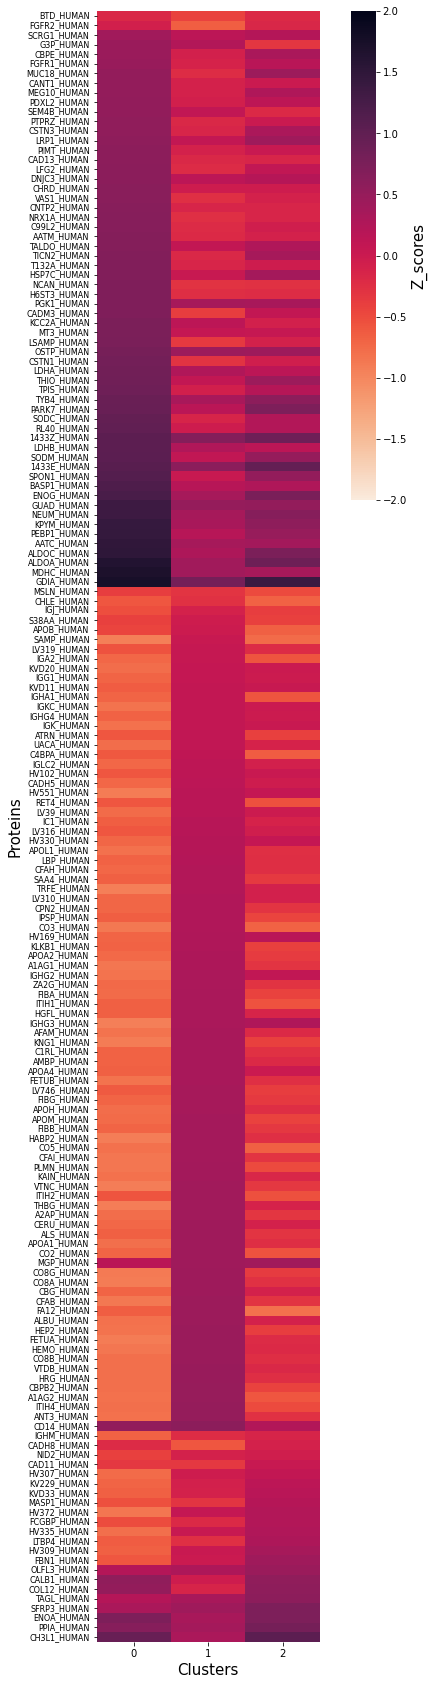

In [211]:
clustered_proteins_matrix_3 = clustered_proteins_df_3.values
clustered_proteins_matrix_means = []

for row in clustered_proteins_matrix_3:
    clustered_proteins_matrix_means.append(row[:-2:2]) 

clustered_proteins_matrix_means = np.array(clustered_proteins_matrix_means)
# clustered_proteins_matrix_means = np.array(sorted(clustere_proteins_matrix_means, key= lambda x:x[0], reverse=True))

# print(clustered_proteins_matrix_means.shape)
# print(protein_cluster_val_3)

sorted_proteins_for_cluster_0 = {}
sorted_proteins_for_cluster_1 = {}
sorted_proteins_for_cluster_2 = {}

for idx, cluster in enumerate(protein_cluster_val_3):
    # print(cluster)
    # print(clustered_proteins_matrix_means[idx])
    if cluster == 0:
        sorted_proteins_for_cluster_0[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    if cluster == 1:
        sorted_proteins_for_cluster_1[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    if cluster == 2:
        sorted_proteins_for_cluster_2[protein_code[idx]] = clustered_proteins_matrix_means[idx]

sorted_proteins_for_cluster_0 = dict(sorted(sorted_proteins_for_cluster_0.items(), key= lambda x : x[1][0]))
sorted_proteins_codes_0 = np.array(list(sorted_proteins_for_cluster_0.keys()))
sorted_proteins_values_0 = np.array(list(sorted_proteins_for_cluster_0.values()))
sorted_proteins_for_cluster_1 = dict(sorted(sorted_proteins_for_cluster_1.items(), key= lambda x : x[1][1]))
sorted_proteins_codes_1 = np.array(list(sorted_proteins_for_cluster_1.keys()))
sorted_proteins_values_1 = np.array(list(sorted_proteins_for_cluster_1.values()))
sorted_proteins_for_cluster_2 = dict(sorted(sorted_proteins_for_cluster_2.items(), key= lambda x : x[1][2]))
sorted_proteins_codes_2 = np.array(list(sorted_proteins_for_cluster_2.keys()))
sorted_proteins_values_2 = np.array(list(sorted_proteins_for_cluster_2.values()))

total_sorted_proteins_val_for_cluster = np.concatenate((sorted_proteins_values_0, sorted_proteins_values_1, sorted_proteins_values_2), axis=0)
total_sorted_proteins_code_for_cluster = np.concatenate((sorted_proteins_codes_0, sorted_proteins_codes_1, sorted_proteins_codes_2), axis = 0)

# print(total_sorted_proteins_val_for_cluster.shape)

# Generating the heatmap
fig = plt.figure(figsize=(5, 30))

ax = sns.heatmap(total_sorted_proteins_val_for_cluster, yticklabels=total_sorted_proteins_code_for_cluster, cmap='rocket_r', vmax=2, vmin=-2, cbar_kws={'location': 'right', 'anchor': (1.0, 1.0), 'shrink': 0.3, 'label': 'Z_scores'}) # RdBu_r
plt.yticks(fontsize=8)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Proteins', fontsize = 15)
ax.figure.axes[-1].yaxis.label.set_size(15)

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Heatmap_clustered_proteins' + new_run +'.png')

In [212]:
# Sorting the clustered_proteins_df and save the matrix
sorted_clustered_proteins_df = clustered_proteins_df_3
sorted_clusterd_proteins_df = sorted_clustered_proteins_df.reindex(total_sorted_proteins_code_for_cluster)
# Saving the matrix
sorted_clusterd_proteins_df.to_excel(results_dir + '/Rank_3_Clustered_proteins' + new_run +'.xlsx')

Clustered protein for the NMF model:
 {'Cluster_0': 60, 'Cluster_1': 70, 'Cluster_2': 40}

Clustered protein for the average values:
 {'Cluster_0': 60, 'Cluster_1': 88, 'Cluster_2': 22}


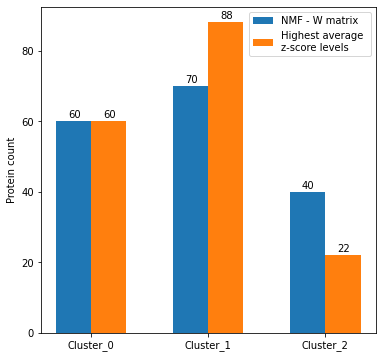

In [213]:
# Counting the number of proteins clusterized with NMF and with highest average levels

count_protein_for_cluster_nmf = {}

for cl in list(clustered_proteins_df_3['NMF protein cluster']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_nmf.keys():
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] += 1

count_protein_for_cluster_nmf = dict(sorted(count_protein_for_cluster_nmf.items(), key=lambda x:x[0]))

print('Clustered protein for the NMF model:\n', count_protein_for_cluster_nmf)
print()

count_protein_for_cluster_average = {}

for cl in list(clustered_proteins_df_3['Cluster with higher protein levels']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_average.keys():
        count_protein_for_cluster_average['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_average['Cluster_' + str(cl)] += 1

count_protein_for_cluster_average = dict(sorted(count_protein_for_cluster_average.items(), key=lambda x : x[0]))

print('Clustered protein for the average values:\n',count_protein_for_cluster_average)

# Plotting the cluster's protein counts

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()

nmf_prot = list(count_protein_for_cluster_nmf.keys())
val_prot = list(count_protein_for_cluster_average.keys())

width = 0.3
ind = np.arange(len(nmf_prot))

ax.bar(nmf_prot, list(count_protein_for_cluster_nmf.values()), width=width, label = 'NMF - W matrix')
ax.bar(ind + width, list(count_protein_for_cluster_average.values()), width=width, label = 'Highest average \nz-score levels')

ax.set_ylabel('Protein count')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])

# for i, v in (count_protein_for_cluster_nmf.items()):
#     print(idx)

nmf_count = list(count_protein_for_cluster_nmf.values())
val_count = list(count_protein_for_cluster_average.values())

for idx in range(len(nmf_prot)):
    ax.annotate(str(nmf_count[idx]), (idx - 0.05, nmf_count[idx] + 1))
    ax.annotate(str(val_count[idx]), (idx - 0.05 + width, val_count[idx] + 1))

ax.legend(loc='best');

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Protein_clusters_NMF_zscore' + new_run +'.png')

In [214]:
# # Printing the proteins for cluster 
# cluster = 0

# for index in clustered_proteins_df_3.index:
#     if clustered_proteins_df_3.loc[index, 'Cluster with higher protein levels'] == cluster:
#         print(index)

#### Determining the most expressed proteins for each cluster

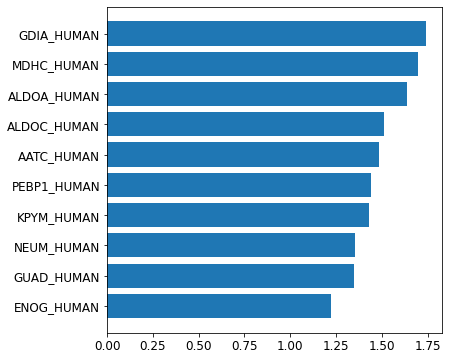

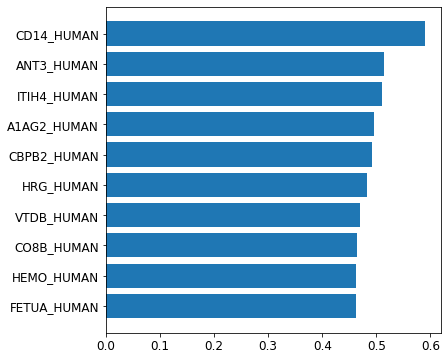

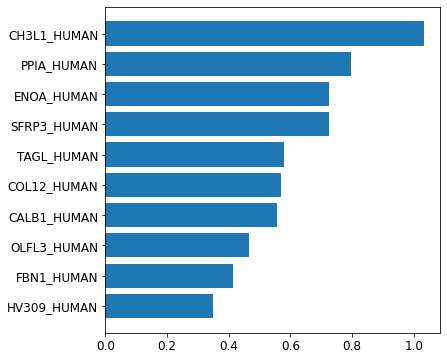

In [215]:
protein_clustered_val_3 = {'0': {}, '1': {}, '2': {}}
protein_clustered_std_3 = {'0': {}, '1': {}, '2': {}}

average_protein_level_clusters = np.array(clustered_proteins_df_3.values)

for idx, protein in enumerate(protein_code):
    cl_prot = str(protein_cluster_val_3[idx])
    # max_exp_level_mean = np.max(average_protein_level_clusters[idx, : ][:-2:2])
    list_mean_std = average_protein_level_clusters[idx, : ][:-2]
    mean_list = list(list_mean_std[::2])
    std_list = list(list_mean_std[1::2])
    idx_max = mean_list.index(np.max(mean_list))
    max_exp_level_mean = mean_list[idx_max]
    max_exp_level_std = std_list[idx_max]
    protein_clustered_val_3[str(cl_prot)][str(protein)] = max_exp_level_mean
    protein_clustered_std_3[str(cl_prot)][str(protein)] = max_exp_level_std
    

# cluster = '0' # Changing the number of the cluster for which you want to see the highest expressed proteins

for cluster in  ['0', '1', '2']:
    protein_cluster = list(protein_clustered_val_3[cluster].keys())
    protein_val = list(protein_clustered_val_3[cluster].values())
    protein_std = list(protein_clustered_std_3[cluster].values())
    sorted_idx = np.argsort(protein_val)[::-1]
    # print(sorted_idx)

    # for idx in sorted_idx:
    #     print(protein_cluster[idx], end='\n\n')

    fig, ax = plt.subplots(figsize=(6, 6))

    first_ten = sorted_idx[:10][::-1]
    # print(first_ten)
    # protein_cluster_first_ten = [prot for prot in protein_cluster[first_ten]]
    protein_cluster_first = []
    protein_val_first = []
    # protein_std_first = []
    for idx in first_ten:
        protein_cluster_first.append(protein_cluster[idx])
        protein_val_first.append(protein_val[idx])
        # protein_std_first.append(protein_std[idx])

    # protein_std_first = [5 for i in range(len(protein_std_first))]

    ax.barh(protein_cluster_first, protein_val_first, capsize=5) #xerr=protein_std_first
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12);

    plt.savefig(results_dir + '/Rank_3_Protein_cluster_' + cluster + '' + new_run +'.png', bbox_inches = "tight")

In [216]:
# print(protein_clustered_val_3)

for cluster in ['0', '1', '2']:

    df_prot_zscore = pd.DataFrame(columns=['protein', 'z_score'])

    i = 0

    for prot, val in protein_clustered_val_3[cluster].items():
        list_to_append = [prot, val]
        df_prot_zscore.loc[i] = list_to_append
        i += 1

    df_prot_zscore = df_prot_zscore.sort_values('z_score', ignore_index=True, ascending=False)

    # Saving in an excel file
    df_prot_zscore.to_excel(results_dir + '/Rank_3_Protein_cluster_' + cluster + '_3' + new_run +'.xlsx')

In [217]:
# df_prot_zscore.to_excel('Results_165/prot_zscore_cl.xlsx')

In [218]:
protein_clusters_dict_3 = {}

for idx, cl in enumerate(protein_cluster_val_3):
    if cl not in protein_clusters_dict_3.keys():
        protein_clusters_dict_3[cl] = [protein_code[idx]]
    else:
        protein_clusters_dict_3[cl].append(protein_code[idx])

protein_clusters_dict_3 = dict(sorted(protein_clusters_dict_3.items(), key=lambda x:x[0]))

In [219]:
file = open(results_dir + '/Rank_3_Clustered_proteins' + new_run + '.txt', 'w')

for cl, proteins in protein_clusters_dict_3.items():
    print(f'Cluster_{cl}:')
    file.write(f'Cluster_{cl}:\n')
    print(f'{proteins} - number of proteins: {len(proteins)}')
    file.write(f'{proteins} - number of proteins: {len(proteins)}\n')

file.close()

Cluster_0:
['LRP1_HUMAN', 'NRX1A_HUMAN', 'CSTN1_HUMAN', 'KPYM_HUMAN', 'PTPRZ_HUMAN', 'OSTP_HUMAN', 'NCAN_HUMAN', 'CBPE_HUMAN', 'MUC18_HUMAN', 'ALDOC_HUMAN', 'BASP1_HUMAN', 'T132A_HUMAN', 'CNTP2_HUMAN', 'ENOG_HUMAN', 'ALDOA_HUMAN', 'PGK1_HUMAN', 'TPIS_HUMAN', 'SPON1_HUMAN', 'CAD13_HUMAN', 'GUAD_HUMAN', 'NEUM_HUMAN', 'BTD_HUMAN', 'SODC_HUMAN', 'C99L2_HUMAN', 'AATC_HUMAN', 'LDHB_HUMAN', 'G3P_HUMAN', 'GDIA_HUMAN', 'LSAMP_HUMAN', 'MEG10_HUMAN', '1433Z_HUMAN', 'HSP7C_HUMAN', 'CHRD_HUMAN', 'CSTN3_HUMAN', 'PEBP1_HUMAN', 'AATM_HUMAN', 'TICN2_HUMAN', 'CANT1_HUMAN', 'MDHC_HUMAN', 'CADM3_HUMAN', 'LDHA_HUMAN', '1433E_HUMAN', 'VAS1_HUMAN', 'PIMT_HUMAN', 'FGFR1_HUMAN', 'PARK7_HUMAN', 'H6ST3_HUMAN', 'DNJC3_HUMAN', 'PDXL2_HUMAN', 'SEM4B_HUMAN', 'TALDO_HUMAN', 'FGFR2_HUMAN', 'RL40_HUMAN', 'SODM_HUMAN', 'SCRG1_HUMAN', 'THIO_HUMAN', 'KCC2A_HUMAN', 'MT3_HUMAN', 'LFG2_HUMAN', 'TYB4_HUMAN'] - number of proteins: 60
Cluster_1:
['APOB_HUMAN', 'CO3_HUMAN', 'ALBU_HUMAN', 'TRFE_HUMAN', 'CFAH_HUMAN', 'CERU_HUMAN',

In [220]:
file = open(results_dir + '/Rank_3_Clustered_proteins_for_comparison' + new_run + '.txt', 'w')

for cl, proteins in protein_clusters_dict_3.items():
    for prot in proteins: 
        file.write(f'{prot} \t {cl} \n')

file.close()

#### **Comparing our proteins clusters with Tijms' clusters**

In [221]:
# # Loading the Tijms protein-clusters dataset
# tijms_clusters_df = pd.read_excel('Lisbon_and_Coimbra_409_proteins_analysis.xlsx', sheet_name='Cell_type_Tijms', index_col=[0])
# tijms_uniprot_code = list(tijms_clusters_df['Uniprot'])
# tijms_list_clusters = list(tijms_clusters_df['Subtype with highest levels'])
# # Our list clusters 
# our_list_clusters = clustered_proteins_df_3['Cluster with higher protein levels']

In [222]:
# not_found_count = 0
# our_proteins_clusters = {}
# tijms_proteins_clusters = {}

# for idx, uniprot in enumerate(uniprot_code):
#     if uniprot not in tijms_uniprot_code:
#         # print(uniprot, protein_code[idx])
#         not_found_count += 1
#     elif uniprot in tijms_uniprot_code:
#         idx_tijms = tijms_uniprot_code.index(uniprot)
#         tijms_cluster = tijms_list_clusters[idx_tijms]
#         our_cluster = our_list_clusters[idx] + 1
#         if our_cluster not in our_proteins_clusters.keys():
#             our_proteins_clusters[our_cluster] = [uniprot]
#         else:
#             our_proteins_clusters[our_cluster].append(uniprot)
#         if tijms_cluster not in tijms_proteins_clusters.keys():
#             tijms_proteins_clusters[tijms_cluster] = [uniprot]
#         else:
#             tijms_proteins_clusters[tijms_cluster].append(uniprot)

# # Sorting the dictionary by the cluter number
# tijms_proteins_clusters = dict(sorted(tijms_proteins_clusters.items(), key=lambda x:x[0]))
# our_proteins_clusters = dict(sorted(our_proteins_clusters.items(), key=lambda x:x[0]))

# # print(our_proteins_clusters)
# # print(tijms_proteins_clusters)

# # Comparing our clusters and the Tijms' one
# count_our_cluster_tijms_cluster = {}
# for our_cluster, our_proteins_list in our_proteins_clusters.items():
#     protein_tijms_clusters = {}
#     for our_protein in our_proteins_list:
#         for tijms_cluster, tijms_proteins_list in tijms_proteins_clusters.items():
#             if our_protein in tijms_proteins_list:
#                 if tijms_cluster not in protein_tijms_clusters.keys():
#                     protein_tijms_clusters[tijms_cluster] = 1
#                 else:
#                     protein_tijms_clusters[tijms_cluster] += 1

#     protein_tijms_clusters = dict(sorted(protein_tijms_clusters.items(), key=lambda x:x[0]))

#     count_our_cluster_tijms_cluster[our_cluster] = protein_tijms_clusters

# # print(count_our_cluster_tijms_cluster)

# # Printing out the results
# for our_cluster, dict_count in count_our_cluster_tijms_cluster.items():
#     print('For our cluster', our_cluster, ', there are:')
#     for tijms_custer, count in dict_count.items():
#         print(f'- {count} proteins in the Tijms cluster {tijms_custer}')       
# print()
# count = 0
# for final_dict in count_our_cluster_tijms_cluster.values():
#     count += sum(final_dict.values())
# print('For a total of', count, 'proteins')  
# print()
# print(f'{not_found_count} proteins are not present in the Tijms work')

# # Saving these results in a txt file
# file = open(results_dir + '/Rank_3_Comparison_protein_cluster_with_Tijms' + new_run +'.txt', 'w')
# for our_cluster, dict_count in count_our_cluster_tijms_cluster.items():
#     file.write(f'For our cluster {our_cluster}, there are:\n')
#     for tijms_custer, count in dict_count.items():
#         file.write(f'- {count} proteins in the Tijms cluster {tijms_custer}\n')       
# file.write('\n')
# count = 0
# for final_dict in count_our_cluster_tijms_cluster.values():
#     count += sum(final_dict.values())
# file.write(f'For a total of {count} proteins')  
# file.write('\n')
# file.write(f'{not_found_count} proteins are not present in the Tijms work')

# file.close()

In [223]:
# fig = plt.figure(figsize=(6, 6))
# ax = plt.subplot()

# width = 0.3
# ind = np.arange(len(count_our_cluster_tijms_cluster))

# tijms_custer_1 = [v[1] for v in count_our_cluster_tijms_cluster.values()]
# # print(tijms_custer_1)
# ax.bar(ind, tijms_custer_1, width=width, label='Tijms cluster 1')


# tijms_custer_2 = [v[2] for v in count_our_cluster_tijms_cluster.values()]
# # print(tijms_custer_2)
# ax.bar(ind + width, tijms_custer_2, width=width, label='Tijms cluster 2')

# tijms_custer_3 = [v[3] for v in count_our_cluster_tijms_cluster.values()]
# # print(tijms_custer_3)
# ax.bar(ind + width*2, tijms_custer_3, width=width, label='Tijms cluster 3')

# ax.set_ylabel('Protein count', fontsize=13)
# ax.set_xticks(ind + width)
# ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])
# ax.set_xlabel('Our clusters', fontsize=13)

# ax.legend(loc='best');

# # Saving the plot
# plt.savefig(results_dir + '/Rank_3_Comparison_protein_cluster_with_Tijms' + new_run +'.png')

### **Cell type**

In [224]:
# brain_rna_seq_data = pd.read_excel('Brain_RNA_seq_database.xlsx', sheet_name='human_mod')

# # resetting the index
# uniprot_code_brain_db = list(brain_rna_seq_data['Uniprot'])
# brain_rna_seq_data = brain_rna_seq_data.drop(['Uniprot'], axis=1)
# brain_rna_seq_data.index = uniprot_code_brain_db

# gene_name_brain_db = list(brain_rna_seq_data['Gene'])

In [225]:
# brain_rna_seq_data

In [226]:
# absent_genes_1 = []

# for idx, gene in enumerate(gene_code):
#     if gene not in gene_name_brain_db:
#         absent_genes_1.append((gene, uniprot_code[idx]))
# print(absent_genes_1)

In [227]:
# gene_cell_type = pd.DataFrame(columns=['Gene Entry', 'Uniprot', 'Astrocytes[mean]', 'Neurons[mean]', 'Oligodendrocytes[mean]', 'Microglia[Mean]', 'Endothelial[mean]',
#                                         'Astrocytes[%]', 'Neurons[%]', 'Oligodendrocytes[%]', 'Microglia[%]', 'Endothelial[%]', 'Cell Type'])

# absent_genes = []

# for idx, uniprot in enumerate(uniprot_code):
#     if uniprot not in uniprot_code_brain_db:
#         absent_genes.append(uniprot)
#         dict_to_append = {k: 'NaN' for k in gene_cell_type.columns}
#         dict_to_append['Gene Entry'] = protein_code[idx]
#         dict_to_append['Uniprot'] = uniprot
#         list_to_append = list(dict_to_append.values())
#         gene_cell_type.loc[idx] = list_to_append
#     else:
#         dict_gene = {'Gene Entry': protein_code[idx]}
#         dict_uniprot = {'Uniprot': uniprot}
#         dict_mean = {}
#         # print(uni, gene_code[idx])
#         dict_mean['Astrocytes[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_mature_astrocytes'], 6)
#         dict_mean['Neurons[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Human Neurons'], 6)
#         dict_mean['Oligodendrocytes[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Oligodendrocytes'], 6)
#         dict_mean['Microglia[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Microglia_Macrophage'], 6)
#         dict_mean['Endothelial[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Endothelial'], 6)        

#         dict_perc = {}
        
#         tot = 0
#         for k, v in dict_mean.items():
#             tot += v
#         dict_perc['Astrocytes[%]'] = round((dict_mean['Astrocytes[mean]'] * 100) / tot, 6)
#         dict_perc['Neurons[%]'] = round((dict_mean['Neurons[mean]'] * 100) / tot, 6)
#         dict_perc['Oligodendrocytes[%]'] = round((dict_mean['Oligodendrocytes[mean]'] * 100) / tot, 6)
#         dict_perc['Microglia[%]'] = round((dict_mean['Microglia[mean]'] * 100) / tot, 6)
#         dict_perc['Endothelial[%]'] = round((dict_mean['Endothelial[mean]'] * 100) / tot, 6) 

#         perc_val = list(dict_perc.values())
#         perc_cell_type = list(dict_perc.keys())
#         max_perc = np.max(perc_val)
#         if max_perc > 50:
#             cell_type = perc_cell_type[perc_val.index(max_perc)][:-3]
#         elif max_perc <= 20:
#             cell_type = 'Not detected'
#         else:
#             cell_type = 'Not specific'
#         dict_perc['Cell Type'] = cell_type

#         dict_to_append = dict_gene | dict_uniprot | dict_mean | dict_perc

#         # Building the dataframe
#         list_to_append = list(dict_to_append.values())
#         gene_cell_type.loc[idx] = list_to_append

# gene_index = list(gene_cell_type['Gene Entry'])
# gene_cell_type = gene_cell_type.drop(['Gene Entry'], axis=1)
# gene_cell_type.index = gene_index

# print('There are', len(absent_genes), 'genes that are not present in the RNAseq-Brain database')
# print(absent_genes)

In [228]:
# gene_cell_type

In [229]:
# Saving the table
# gene_cell_type.to_excel(results_dir + '/Rank_3_Gene_cell_type' + new_run +'.xlsx')

### **Cell type for cluster**

#### All cell type for clusters

In [230]:
# gene_cell_type_list = list(gene_cell_type['Cell Type'])

# # cell_type_dict = {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0}

# cell_type_for_cluster = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                         'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                         'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}

# for idx, cluster in enumerate(protein_cluster_val_3):
#     cluster_n = 'Cluster_'+str(cluster)
#     cell_type_for_cluster[cluster_n][gene_cell_type_list[idx]] += 1
#     cell_type_for_cluster[cluster_n]['Total'] += 1

# print(cell_type_for_cluster)

# cell_type_for_cluster_df = pd.DataFrame.from_dict(cell_type_for_cluster)
# cell_type_for_cluster_df

# # Saving the table
# cell_type_for_cluster_df.to_excel(results_dir + '/Rank_3_Cell_type_for_cluster' + new_run +'.xlsx')

In [231]:
# cell_type_for_cluster_df.to_excel(results_dir + '/Rank_3_Cell_type_for_cluster' + new_run +'.xlsx')

**Pie charts**

In [232]:
# # Plotting with pie charts
# cluster_to_plot = 'Cluster_2'

# for cluster_to_plot in ['Cluster_0', 'Cluster_1', 'Cluster_2']:

#     values = list(cell_type_for_cluster_df[cluster_to_plot])[:-1]

#     fig = plt.figure(figsize=(8, 8))
#     plt.pie(values, labels=list(cell_type_for_cluster_df.index)[:-1], textprops={'fontsize': 15}, autopct='%1.0f%%', explode=[0.01 for i in range(len(values))])
#     plt.title(cluster_to_plot, fontsize=20);
    
#     # Saving the plot
#     plt.savefig(results_dir + '/Rank_3_Cell_type_' + cluster_to_plot + '' + new_run + '.png')

#### Protein lower or greater than control - Cell type

In [233]:
# clustered_proteins_matrix_3 = clustered_proteins_df_3.values
# clustered_proteins_matrix_means = []

# # print(clustered_proteins_matrix_3)

# for row in clustered_proteins_matrix_3:
#     # print(row[:-2:2])
#     clustered_proteins_matrix_means.append(row[:-2:2])

# clustered_proteins_matrix_means = np.array(clustered_proteins_matrix_means)
# # print(clustered_proteins_matrix_means)

# protein_lower_greater_control = []

# for idx, uniprot in enumerate(uniprot_code):
#     temp_clustered_protein_means = clustered_proteins_matrix_means[idx]
#     temp_cluster = protein_cluster_val_3[idx]
#     if temp_clustered_protein_means[temp_cluster] > 0:
#         protein_lower_greater_control.append(1)
#     elif temp_clustered_protein_means[temp_cluster] < 0:
#         protein_lower_greater_control.append(-1)

# # print(protein_lower_greater_control)
# protein_lower_than_control_cell_type = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                                         'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                                         'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}

# protein_greater_than_control_cell_type = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                                           'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
#                                           'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}


# for idx, protein in enumerate(protein_code):
#     # print(protein, protein_lower_greater_control[idx], protein_cluster_val_3[idx])
#     if protein_lower_greater_control[idx] < 0:
#         # print(protein, protein_lower_greater_control[idx], protein_cluster_val_3[idx])
#         temp_cell_type = gene_cell_type.loc[protein, 'Cell Type']
#         temp_cluster = protein_cluster_val_3[idx]
#         # print(temp_cell_type)
#         protein_lower_than_control_cell_type['Cluster_' + str(temp_cluster)][temp_cell_type] += 1
#         protein_lower_than_control_cell_type['Cluster_' + str(temp_cluster)]['Total'] += 1
#     elif protein_lower_greater_control[idx] > 0:
#         temp_cell_type = gene_cell_type.loc[protein, 'Cell Type']
#         temp_cluster = protein_cluster_val_3[idx]
#         protein_greater_than_control_cell_type['Cluster_' + str(temp_cluster)][temp_cell_type] += 1
#         protein_greater_than_control_cell_type['Cluster_' + str(temp_cluster)]['Total'] += 1

# cell_type_protein_lower_control_df = pd.DataFrame(protein_lower_than_control_cell_type)
# cell_type_protein_greater_control_df = pd.DataFrame(protein_greater_than_control_cell_type)

# # Save the table
# cell_type_protein_lower_control_df.to_excel(results_dir + '/Rank_3_Cell_type_lower_than_control' + new_run +'.xlsx')
# cell_type_protein_greater_control_df.to_excel(results_dir + '/Rank_3_Cell_type_greater_than_control' + new_run +'.xlsx')

In [234]:
# print('For a total of', protein_lower_greater_control.count(-1), 'proteins that are lower than the control')
# cell_type_protein_lower_control_df

In [235]:
# print('For a total of', protein_lower_greater_control.count(1), 'proteins that are greater than the control')
# cell_type_protein_greater_control_df

In [236]:
# cell_type_protein_lower_control_df.to_excel('Cell_type_protein_lower_control.xlsx')
# cell_type_protein_greater_control_df.to_excel('Cell_type_protein_greater_control.xlsx')

## **Rank = 4**

In [237]:
# Building the model with rank = 4
nsnmf_4 = nimfa.Nsnmf(V, rank=4, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                      track_factor=True, track_error=True, update='divergence', objective='div')
nsnmf_4_fit = nsnmf_4()

In [238]:
len(nsnmf_4_fit.fit.tracker.get_error())

819

In [239]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_4 = nsnmf_4_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_4)

cophonetic_results['Rank_4'] = cophonetic_cor_coef_4

Cophenetic correlation coefficient: 0.9161184829823255


### **Consensus matrix**

C:\Users\haidos\AppData\Local\Temp\ipykernel_19936\2410144208.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



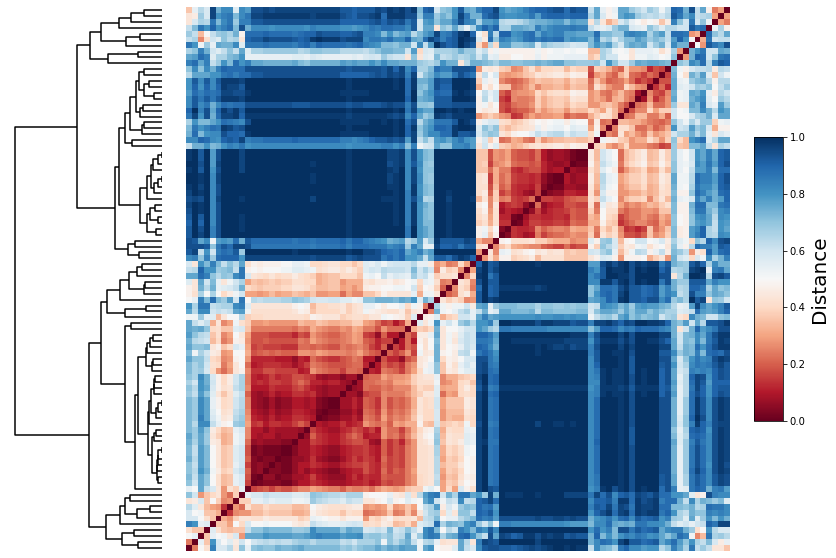

In [240]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_4 = 1 - nsnmf_4_fit.fit.consensus()
Y = sch.linkage(C_4, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_4[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_4_Consensus_matrix' + new_run +'.png')

### **W matrix**

In [241]:
# Computing the W basis matrix
W_4 = nsnmf_4_fit.fit.basis()

print(f'The shape of the W matrix is: {W_4.shape[0]} rows (proteins) x {W_4.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 170 rows (proteins) x 4 columns (metaproteins)


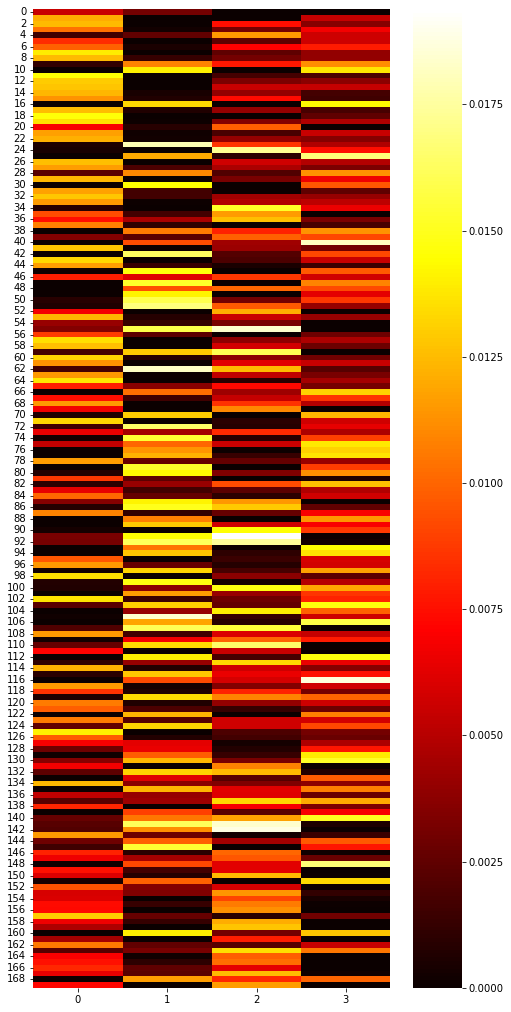

In [242]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_4[: , : ], cmap='hot') #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_4_W_matrix' + new_run +'.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [243]:
prot_clusters_dict_4 = k_proteins_of_metaprotein(W_4, 4)

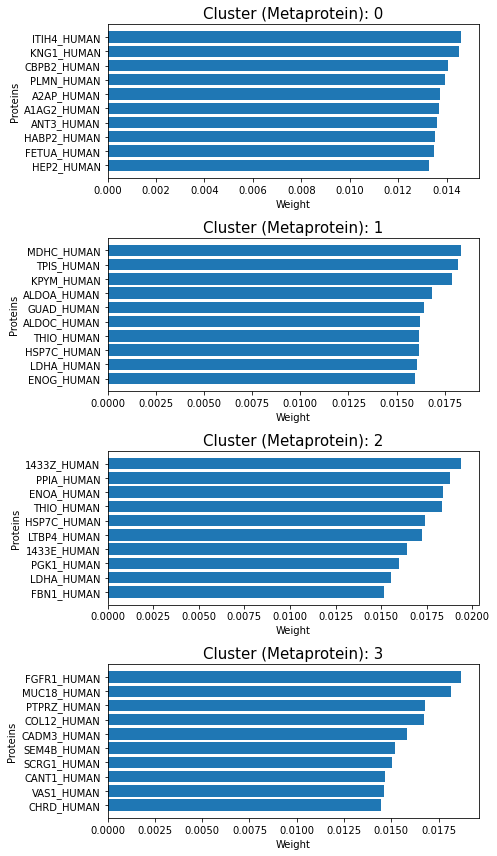

In [244]:
plotting_metaproteins(prot_clusters_dict_4)

### **H matrix**

In [245]:
# Computing the H coef matrix
H_4 = np.array(nsnmf_4_fit.fit.coef())

print(f'The shape of the H matrix is: {H_4.shape[0]} rows (metaprotein) x {H_4.shape[1]} columns (patients)')

The shape of the H matrix is: 4 rows (metaprotein) x 92 columns (patients)


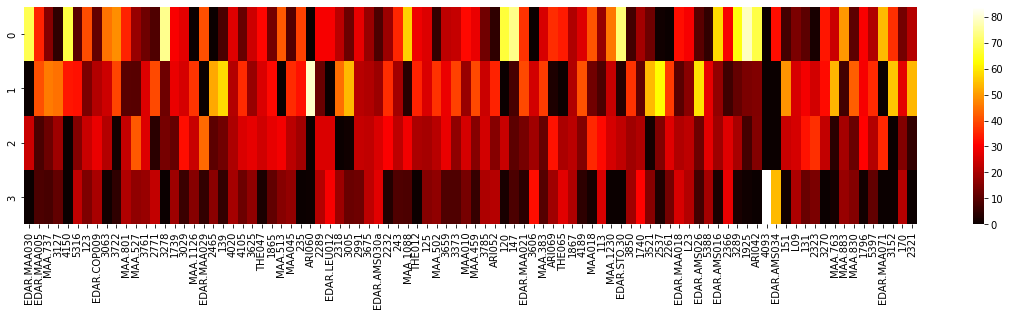

In [246]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_4[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_4_H_matrix' + new_run +'.png')

In [247]:
patient_clusters_4 = cluster_assign_patients(H_4)

In [248]:
clustered_patient_4 = grouping_patients_for_cluster(patient_clusters_4)

Cluster(Metaprotein)_0: ['EDAR.MAA030', '4150', '123', '3063', '3722', 'MAA.801', '3278', '1739', '4020', 'THE047', 'MAA.513', '235', '2289', '2991', '243', 'MAA.1088', '125', 'MAA010', '120', '147', 'ARI069', 'THE065', 'MAA018', 'MAA.1230', 'EDAR.STO.30', 'EDAR.MAA018', 'L23', 'EDAR.AMS016', '2366', '3289', '1925', 'ARI042', '3270', 'MAA.883', 'EDAR.MAA071'] - N° of patients: 35 

Cluster(Metaprotein)_1: ['EDAR.MAA005', 'MAA.737', '3127', '5316', '2771', 'MAA.1126', '2465', '139', '4105', '1865', 'MAA045', 'ARI060', '2318', '3005', '2232', 'THE012', 'MAA.502', '3659', '3373', 'MAA.459', 'ARI052', 'EDAR.MAA021', 'MAA.383', '4189', '3850', '3521', '2537', '2261', 'EDAR.AMS026', '5388', '151', 'L09', 'MAA.763', 'MAA.830', '5397', '3152', '170', '2321'] - N° of patients: 38 

Cluster(Metaprotein)_2: ['EDAR.COP009', 'MAA.527', '3761', '3029', 'EDAR.MAA029', '3625', '3675', '3785', '1867', '113', '131', '2323', '1796'] - N° of patients: 13 

Cluster(Metaprotein)_3: ['EDAR.LEU012', 'EDAR.AMS

In [249]:
# Saving the clustered patients
f = open(results_dir + '/Rank_4_Clustered_patients' + new_run +'.txt', 'w')

for cluster, patient in clustered_patient_4.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

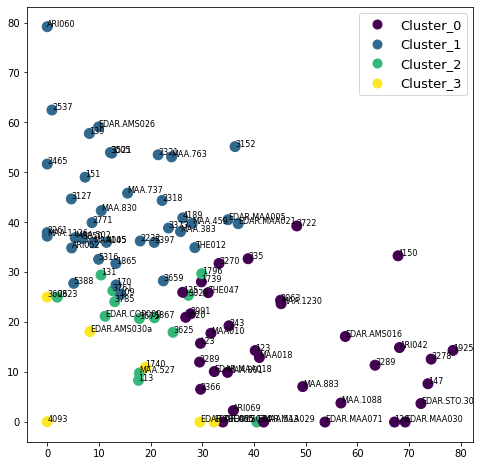

In [250]:
plotting_clusters(H_4, patient_clusters_4)

### **Computing the Silhouette Score**

In [251]:
silhouette_score_4 = silhouette_score(C_4, list(patient_clusters_4.values()))
print(silhouette_score_4)

silhouette_results['Rank_4'] = silhouette_score_4

0.4299937358997968


C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Silhouette average score: 0.4299937359254084


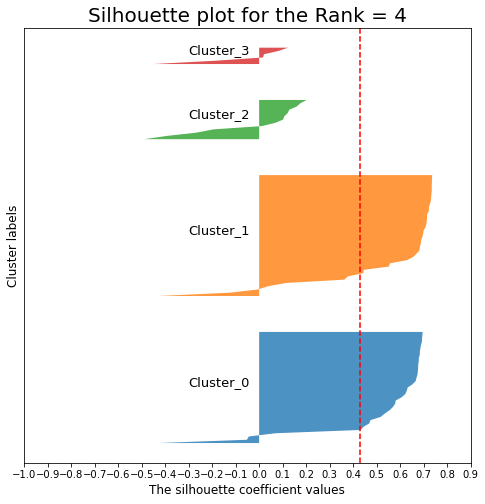

In [252]:
silhouette_plot(C_4, patient_clusters_4)

### **Explained Variance**

In [253]:
# Explained Variance best fit
var_4 = nsnmf_4_fit.fit.evar()
print('Variance best model:', var_4)
ex_var_best_fit['Rank_4'] = var_4

# Explained Variance Random model
nsnmf_4_random = nimfa.Nsnmf(V, rank=4, n_run=1, max_iter=1)
nsnmf_4_random_fit = nsnmf_4_random()
var_4_random = nsnmf_4_random_fit.fit.evar()
print('Varince random model:', var_4_random)
ex_var_random['Rank_4'] = var_4_random

Variance best model: 0.9656780067938038
Varince random model: 0.021007634074678982


## **Rank = 5**

In [254]:
# Building the model with rank = 5
nsnmf_5 = nimfa.Nsnmf(V, rank=5, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                      track_factor=True, track_error=True, update='divergence', objective='div')
nsnmf_5_fit = nsnmf_5()

In [255]:
len(nsnmf_5_fit.fit.tracker.get_error())

1000

In [256]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_5 = nsnmf_5_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_5)

cophonetic_results['Rank_5'] = cophonetic_cor_coef_5

Cophenetic correlation coefficient: 0.8874366237136956


### **Consensus matrix**

C:\Users\haidos\AppData\Local\Temp\ipykernel_19936\1729301149.py:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



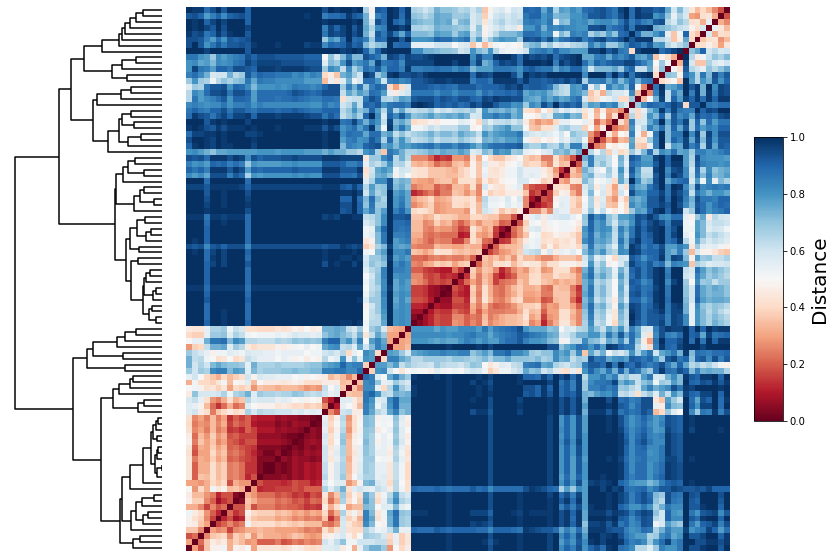

In [257]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_5 = 1 - nsnmf_5_fit.fit.consensus()
Y = sch.linkage(C_5, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_5[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_5_Consensus_matrix' + new_run +'.png')

### **W matrix**

In [258]:
# Computing the W basis matrix
W_5 = nsnmf_5_fit.fit.basis()

print(f'The shape of the W matrix is: {W_5.shape[0]} rows (proteins) x {W_5.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 170 rows (proteins) x 5 columns (metaproteins)


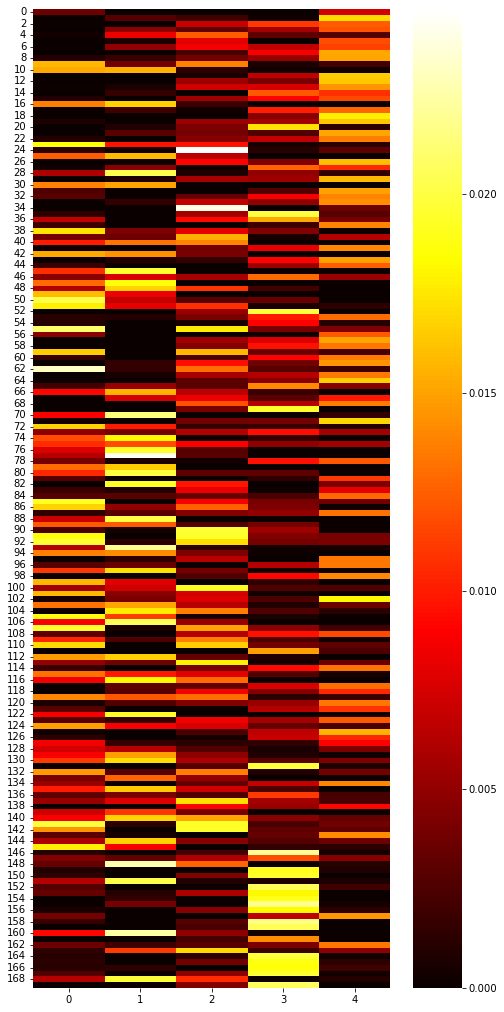

In [259]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_5[: , : ], cmap='hot') #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_5_W_matrix' + new_run +'.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [260]:
prot_clusters_dict_5 = k_proteins_of_metaprotein(W_5, 5)

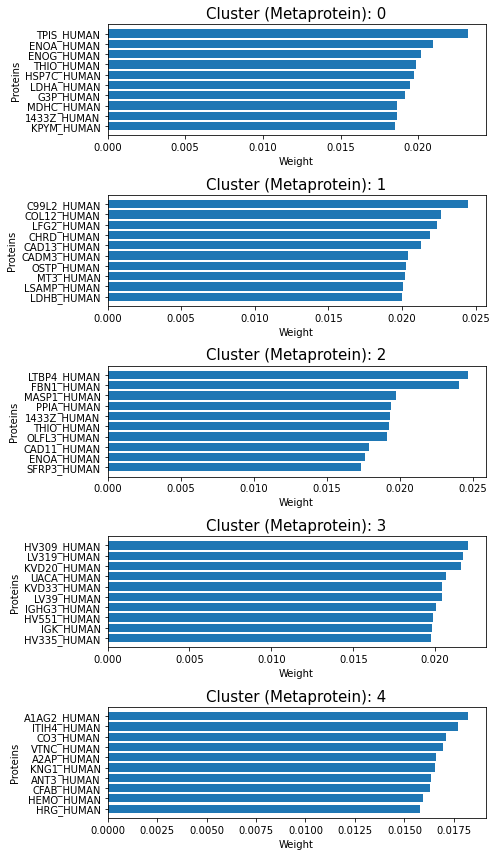

In [261]:
plotting_metaproteins(prot_clusters_dict_5)

### **H matrix**

In [262]:
# Computing the H coef matrix
H_5 = np.array(nsnmf_5_fit.fit.coef())

print(f'The shape of the H matrix is: {H_5.shape[0]} rows (metaprotein) x {H_5.shape[1]} columns (patients)')

The shape of the H matrix is: 5 rows (metaprotein) x 92 columns (patients)


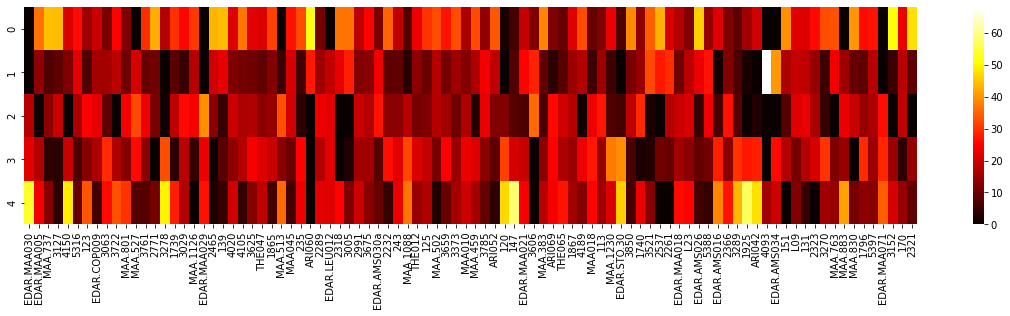

In [263]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_5[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_5_H_matrix' + new_run +'.png')

In [264]:
patient_clusters_5 = cluster_assign_patients(H_5)

In [265]:
clustered_patient_5 = grouping_patients_for_cluster(patient_clusters_5)

Cluster(Metaprotein)_0: ['EDAR.MAA005', 'MAA.737', '3127', '5316', '3761', '2771', '1739', 'MAA.1126', '2465', '139', '4020', '4105', '1865', 'MAA045', '235', 'ARI060', '2318', '3005', '3675', '2232', 'THE012', '125', 'MAA.502', '3659', '3373', 'MAA.459', 'ARI052', 'MAA.383', '1867', '4189', '3850', '3521', '2537', 'EDAR.AMS026', '151', 'L09', '2323', '3270', 'MAA.763', 'MAA.830', '5397', '3152', '170', '2321'] - N° of patients: 44 

Cluster(Metaprotein)_1: ['3785', 'EDAR.MAA021', '2261', '5388', '4093', 'EDAR.AMS034'] - N° of patients: 6 

Cluster(Metaprotein)_2: ['EDAR.COP009', 'MAA.527', '3029', 'EDAR.MAA029', '2289', 'EDAR.AMS030a', '3606', 'ARI069', '113', '1740', '131'] - N° of patients: 11 

Cluster(Metaprotein)_3: ['3063', '3625', 'THE047', 'EDAR.LEU012', 'MAA010', 'MAA018', 'MAA.1230', '1796'] - N° of patients: 8 

Cluster(Metaprotein)_4: ['EDAR.MAA030', '4150', '123', '3722', 'MAA.801', '3278', 'MAA.513', '2991', '243', 'MAA.1088', '120', '147', 'THE065', 'EDAR.STO.30', 'EDAR

In [266]:
# Saving the clustered patients
f_1 = open(results_dir + '/Rank_5_Clustered_patients' + new_run +'.txt', 'w')

for cluster, patient in clustered_patient_5.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f_1.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f_1.write('\n')

f_1.close()

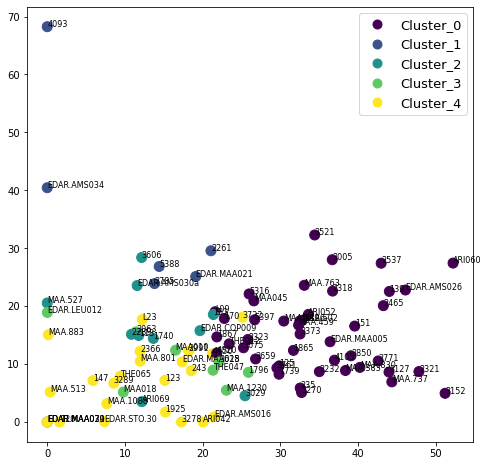

In [267]:
plotting_clusters(H_5, patient_clusters_5)

### **Computing the Silhouette Score**

In [268]:
silhouette_score_5 = silhouette_score(C_5, list(patient_clusters_5.values()))
print(silhouette_score_5)

silhouette_results['Rank_5'] = silhouette_score_5

0.2530041580230787


C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

C:\Users\haidos\miniconda3\envs\nmf\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Silhouette average score: 0.25300415802307397


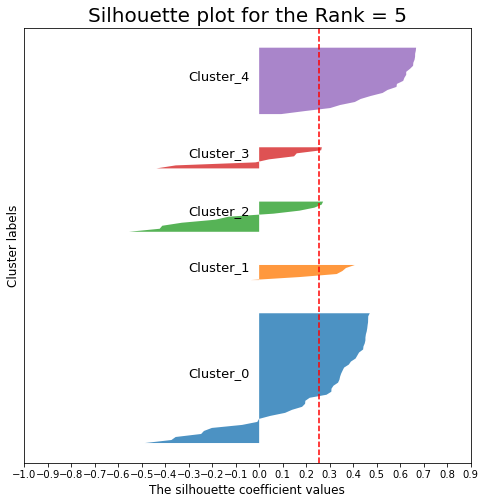

In [269]:
silhouette_plot(C_5, patient_clusters_5)

### **Explained Variance**

In [270]:
# Explained Variance best fit
var_5 = nsnmf_5_fit.fit.evar()
print('Variance best model:', var_5)
ex_var_best_fit['Rank_5'] = var_5


# Explained Variance Random model
nsnmf_5_random = nimfa.Nsnmf(V, rank=5, n_run=1, max_iter=1)
nsnmf_5_random_fit = nsnmf_5_random()
var_5_random = nsnmf_5_random_fit.fit.evar()
print('Varince random model:', var_5_random)
ex_var_random['Rank_5'] = var_5_random

Variance best model: 0.9679011022045305
Varince random model: 0.02187926731765999


## **Final results and Improved fit**

In [271]:
# Saving the results to a txt file
file_1 = open(results_dir + '/0_Final_results_' + day + '' + new_run +'.txt', 'w')

i = 0
file_1.write(f'- Proteins: {len(protein_code)} - Patients: {len(patient_code)}\n')
file_1.write(f'- N_runs: {n_run} - Max_iter: {max_iter}\n')
file_1.write('\n')

for rank, val in ex_var_best_fit.items():
    print('-----', rank, '------') 
    file_1.write(f'-----------{rank}------------ \n')
    random_val = ex_var_random[rank]
    # Printing cophonetic and silhouette score
    print(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}')
    file_1.write(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}\n')
    print(f'- Silhouette score: {silhouette_results[rank]}')    
    file_1.write(f'- Silhouette score: {silhouette_results[rank]}\n') 
    if i != 0:
        prec_val = prec_val * 100   
        actual_val = val * 100
        increase = actual_val - prec_val
        increase_perc = ((increase / prec_val) * 100) * 100
        print(f'Best_fit_increase: {increase_perc}\n')
        file_1.write(f'Best_fit_increase: {increase_perc}\n')
        print(f'- Improved fit: {increase_perc / (random_val*100)}\n')
        file_1.write(f'- Improved fit: {increase_perc / (random_val*100)}\n')
    else:
        print('Best_fit_increase: NA')
        file_1.write('Best_fit_increase: NA \n')
        print('- Improved fit: NA')
        file_1.write('- Improved fit: NA \n')
    file_1.write('\n')
    prec_val = val
    i += 1  
file_1.close()

----- Rank_2 ------
- Cophonetic correlation coefficient: 0.9927706855114532
- Silhouette score: 0.8850426120152749
Best_fit_increase: NA
- Improved fit: NA
----- Rank_3 ------
- Cophonetic correlation coefficient: 0.9367468140636356
- Silhouette score: 0.5983591326327081
Best_fit_increase: 33.63303090689411

- Improved fit: 16.034344940349513

----- Rank_4 ------
- Cophonetic correlation coefficient: 0.9161184829823255
- Silhouette score: 0.4299937358997968
Best_fit_increase: 32.050332623460505

- Improved fit: 15.256516992597257

----- Rank_5 ------
- Cophonetic correlation coefficient: 0.8874366237136956
- Silhouette score: 0.2530041580230787
Best_fit_increase: 23.021083581551423

- Improved fit: 10.5218713439137



In [272]:
# # Saving the results to a txt file
# # file_1 = open(results_dir + '/0_Final_results_' + day + '' + new_run +'.txt', 'w')

# i = 0
# # file_1.write(f'- Proteins: {len(protein_code)} - Patients: {len(patient_code)}\n')
# # file_1.write(f'- N_runs: {n_run} - Max_iter: {max_iter}\n')
# # file_1.write('\n')

# # print(ex_var_best_fit)

# for rank, val in ex_var_best_fit.items():
#     print('-----', rank, '------') 
#     # file_1.write(f'-----------{rank}------------ \n')
#     random_val = ex_var_random[rank]
#     # Printing cophonetic and silhouette score
#     print(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}')
#     # file_1.write(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}\n')
#     print(f'- Silhouette score: {silhouette_results[rank]}')    
#     # file_1.write(f'- Silhouette score: {silhouette_results[rank]}\n') 
#     # print('Best fit increase:', actual_val - )
#     if i != 0:
#         prec_val = prec_val * 100
#         print(prec_val)   
#         actual_val = val * 100
#         print(actual_val)
#         increase = actual_val - prec_val
#         increase_perc = ((increase / prec_val) * 100) * 100
#         print(f'Best_fit_increase: {increase_perc}\n')
#         # file_1.write(f'Best_fit_increase: {increase_perc}\n')
#         print(f'- Improved fit: {increase_perc / (random_val*100)}\n')
#         # file_1.write(f'- Improved fit: {increase_perc / (random_val*100)}\n')
#     else:
#         print('Best_fit_increase: NA')
#         # file_1.write('Best_fit_increase: NA \n')
#         print('- Improved fit: NA')
#         # file_1.write('- Improved fit: NA \n')
#     # file_1.write('\n')
#     prec_val = val
#     i += 1  
# # file_1.close()

In [273]:
# file = open(results_dir + '/capo_espiatorio' + day + '' + new_run +'.txt', 'w')
# file.write('Capo espiatorio\n')
# file.write('Capo espiatorio\n')
# file.close()

## **Saving the environment**

In [274]:
dill.dump_session(results_dir + '/1_Protein_165_Clustering_py_final_env_' + day + '' + new_run +'.db')

In [275]:
# os.remove('Protein_165_Clustering_py_final_env.db')

In [276]:
dill.dump_session('Protein_165_Clustering_py_final_env.db')